#**Riyadh** **City** **Airbnb**

<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/69450217-6cee2780-0d3b-11ea-947b-461ea407da85.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>




# **Exploratory Data Analysis - EDA**

In [1]:
# Import Libraries & setup

import numpy as np
import pandas as pd
import json
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# sklearn imports used later in pipeline/ML blocks
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans

import joblib
import shap

import warnings
warnings.filterwarnings('ignore')

# plotting defaults
sns.set(style="whitegrid", rc={'figure.figsize':(10,5)})
pd.options.display.max_columns = 200

In [2]:
#Load data

Airbnb = pd.read_excel('airbnb_updated.xlsx')

In [3]:
# Quick check (versions)

print("pandas", pd.__version__, "numpy", np.__version__)
try:
    import sklearn
    print("sklearn", sklearn.__version__)
except:
    pass
try:
    print("shap", shap.__version__)
except:
    pass

pandas 2.2.2 numpy 2.0.2
sklearn 1.6.1
shap 0.48.0


**Quick Overview**

- Display the general shape of the dataset (number of rows and columns)
- Show the first 3 rows and last 3 rows (Head / Tail)
- Check data types and count of non-null values (Info)

**Purpose:** Get a quick understanding of the dataset before any analysis.

In [4]:
# Quick overview

print("\nDataset Shape:", Airbnb.shape)
display(Airbnb.head(3))
display(Airbnb.tail(3))
Airbnb.info()


Dataset Shape: (2360, 20)


property_id                              name  bathrooms  bedrooms  \
0  1002133271483358793  Big studio with private entrance        1.0         1   
1  1002133271483358793  Big studio with private entrance        1.0         1   
2  1002133271483358793  Big studio with private entrance        1.0         1   

   beds    city  isSuperhost      lat       lng  persons  reviewsCount  \
0     1  Riyadh         True  24.8199  46.72703        2             9   
1     1  Riyadh         True  24.8199  46.72703        2             9   
2     1  Riyadh         True  24.8199  46.72703        2             9   

   rating      property_type   owner_Id  \
0     5.0  Entire guesthouse  412783850   
1     5.0  Entire guesthouse  412783850   
2     5.0  Entire guesthouse  412783850   

                                 address  \
0  Riyadh, Riyadh Province, Saudi Arabia   
1  Riyadh, Riyadh Province, Saudi Arabia   
2  Riyadh, Riyadh Province, Saudi Arabia   

                                          amenityIds     cancelPolicy  \
0  [1, 4, 5, 8, 9, 73, 137, 77, 79, 657, 86, 89, ...  CANCEL_MODERATE   
1  [1, 4, 5, 8, 9, 73, 137, 77, 79, 657, 86, 89, ...  CANCEL_MODERATE   
2  [1, 4, 5, 8, 9, 73, 137, 77, 79, 657, 86, 89, ...  CANCEL_MODERATE   

                                         price_items             check_in  \
0  {'rate': 76, 'currency': 'USD', 'total': 980, ...           2024-11-24   
1  {'rate': 76, 'currency': 'USD', 'total': 1282,...  2024-11-26 00:00:00   
2  {'rate': 76, 'currency': 'USD', 'total': 602, ...           2024-11-27   

    check_out  
0  2024-12-07  
1  2024-12-13  
2  2024-12-05

property_id                              name  bathrooms  \
2357  990534577913172496       Modern & Cozy Apartment - 2        2.0   
2358  990534577913172496       Modern & Cozy Apartment - 2        2.0   
2359  992845734022008513  Apartment full of all your needs        1.0   

      bedrooms  beds    city  isSuperhost        lat        lng  persons  \
2357         3     4  Riyadh         True  24.827003  46.736704        6   
2358         3     4  Riyadh         True  24.827003  46.736704        6   
2359         1     1  Riyadh         True  24.789480  46.615830        2   

      reviewsCount  rating       property_type   owner_Id  \
2357            45    4.84  Entire rental unit  271363050   
2358            45    4.84  Entire rental unit  271363050   
2359             5    4.40  Entire rental unit  498129881   

                                    address  \
2357  Riyadh, Riyadh Province, Saudi Arabia   
2358  Riyadh, Riyadh Province, Saudi Arabia   
2359  Riyadh, Riyadh Province, Saudi Arabia   

                                             amenityIds  \
2357  [1, 33, 611, 4, 5, 37, 8, 40, 9, 41, 73, 11, 1...   
2358  [1, 33, 611, 4, 5, 37, 8, 40, 9, 41, 73, 11, 1...   
2359  [1, 33, 34, 4, 5, 8, 9, 47, 51, 52, 90, 27, 91...   

                                cancelPolicy  \
2357                         CANCEL_FLEXIBLE   
2358                         CANCEL_FLEXIBLE   
2359  CANCEL_BETTER_STRICT_WITH_GRACE_PERIOD   

                                            price_items    check_in  \
2357  {'rate': 160, 'currency': 'USD', 'total': 319,...  2024-12-27   
2358  {'rate': 160, 'currency': 'USD', 'total': 478,...  2024-12-28   
2359  {'rate': 1344, 'currency': 'USD', 'total': Non...  2024-10-25   

       check_out  
2357  2024-12-29  
2358  2024-12-31  
2359  2024-12-03

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    2360 non-null   int64  
 1   name           2360 non-null   object 
 2   bathrooms      2355 non-null   float64
 3   bedrooms       2360 non-null   int64  
 4   beds           2360 non-null   int64  
 5   city           2360 non-null   object 
 6   isSuperhost    2360 non-null   bool   
 7   lat            2360 non-null   float64
 8   lng            2360 non-null   float64
 9   persons        2360 non-null   int64  
 10  reviewsCount   2360 non-null   int64  
 11  rating         1660 non-null   float64
 12  property_type  2360 non-null   object 
 13  owner_Id       2360 non-null   int64  
 14  address        2360 non-null   object 
 15  amenityIds     2360 non-null   object 
 16  cancelPolicy   2360 non-null   object 
 17  price_items    2360 non-null   object 
 18  check_in

**Outcome:**
- Dataset has (2360 rows x 20 cols), column types identified (numeric vs categorical), initial missing values observed in some columns (e.g., bathrooms, rating).

**Identify Numeric & Categorical Columns**

- Separate columns into numeric and categorical types

- Print numeric columns, Print categorical columns.

**Purpose:** Facilitate statistical analysis and visualization by knowing which columns are numeric vs categorical.

In [5]:
# Identify numeric & categorical columns (robust)

# start with typical numeric dtypes
numeric_cols = Airbnb.select_dtypes(include=[np.number]).columns.tolist()

# exclude very-high-cardinality numeric-like columns (likely IDs or timestamps)
high_cardinality = [c for c in numeric_cols if Airbnb[c].nunique() / len(Airbnb) > 0.95]
if high_cardinality:
    print("Excluding high-cardinality numeric columns (likely IDs):", high_cardinality)
    numeric_cols = [c for c in numeric_cols if c not in high_cardinality]

# categorical: object, category, and pandas nullable boolean included for analysis
categorical_cols = (Airbnb.select_dtypes(include=['object','category']).columns.tolist()
                    + Airbnb.select_dtypes(include='boolean').columns.tolist())

print("\nNumeric columns (selected):", numeric_cols)
print("Categorical columns (selected):", categorical_cols)


Numeric columns (selected): ['property_id', 'bathrooms', 'bedrooms', 'beds', 'lat', 'lng', 'persons', 'reviewsCount', 'rating', 'owner_Id']
Categorical columns (selected): ['name', 'city', 'property_type', 'address', 'amenityIds', 'cancelPolicy', 'price_items', 'check_in', 'check_out', 'isSuperhost']


**Outcome:** Numeric and categorical columns correctly identified, ready for summary statistics and plots.

**Statistical Summary & Missing Values**
- Provide statistical summary for numeric and categorical columns (mean, median, std, min, max)
- Identify missing values and percentage per column

**Purpose:** Understand data distribution and detect missing values.

In [6]:
# Statistical summary & missing values

print("\n--- Describe (numeric + object summary) ---")
display(Airbnb.describe(include='all').T)

missing = Airbnb.isnull().sum()
missing_percent = (missing / len(Airbnb) * 100).round(2)
missing_summary = pd.DataFrame({'Missing': missing, 'Percent': missing_percent})
print("\n--- Missing values summary (top 30) ---")
display(missing_summary.sort_values(by='Percent', ascending=False).head(30))


--- Describe (numeric + object summary) ---


count unique  \
property_id    2360.0    NaN   
name             2360    378   
bathrooms      2355.0    NaN   
bedrooms       2360.0    NaN   
beds           2360.0    NaN   
city             2360      6   
isSuperhost      2360      2   
lat            2360.0    NaN   
lng            2360.0    NaN   
persons        2360.0    NaN   
reviewsCount   2360.0    NaN   
rating         1660.0    NaN   
property_type    2360     17   
owner_Id       2360.0    NaN   
address          2360     10   
amenityIds       2360    366   
cancelPolicy     2360      4   
price_items      2360   1548   
check_in         2360     43   
check_out        2360     37   

                                                             top  freq  \
property_id                                                  NaN   NaN   
name                                        2A studio in Al-Aqiq    41   
bathrooms                                                    NaN   NaN   
bedrooms                                                     NaN   NaN   
beds                                                         NaN   NaN   
city                                                      Riyadh  2292   
isSuperhost                                                False  1423   
lat                                                          NaN   NaN   
lng                                                          NaN   NaN   
persons                                                      NaN   NaN   
reviewsCount                                                 NaN   NaN   
rating                                                       NaN   NaN   
property_type                                 Entire rental unit  1922   
owner_Id                                                     NaN   NaN   
address                    Riyadh, Riyadh Province, Saudi Arabia  2272   
amenityIds                               [1, 51, 4, 52, 5, 8, 9]    57   
cancelPolicy                                     CANCEL_FLEXIBLE  1795   
price_items    {'rate': 1410, 'currency': 'USD', 'total': Non...    10   
check_in                                              2024-11-01   200   
check_out                                             2024-12-24   160   

                                mean                   std         min  \
property_id    1047111157349399808.0  285906155290788576.0  20023187.0   
name                             NaN                   NaN         NaN   
bathrooms                   1.162845              0.521337         0.0   
bedrooms                    1.113983              0.518557         0.0   
beds                        1.172881              0.790325         0.0   
city                             NaN                   NaN         NaN   
isSuperhost                      NaN                   NaN         NaN   
lat                        24.782615              0.052587    24.47186   
lng                        46.667073              0.064399   46.423872   
persons                     2.827119              1.540394         1.0   
reviewsCount                20.30678             34.899698         0.0   
rating                      4.902795              0.148337         3.5   
property_type                    NaN                   NaN         NaN   
owner_Id            406558836.008898      162349152.782683    299917.0   
address                          NaN                   NaN         NaN   
amenityIds                       NaN                   NaN         NaN   
cancelPolicy                     NaN                   NaN         NaN   
price_items                      NaN                   NaN         NaN   
check_in                         NaN                   NaN         NaN   
check_out                        NaN                   NaN         NaN   

                                 25%                    50%  \
property_id    1017131192257776640.0  1137009710973977472.0   
name                             NaN                    NaN   
bathrooms                        1.0        


--- Missing values summary (top 30) ---


Missing  Percent
rating             700    29.66
bathrooms            5     0.21
name                 0     0.00
property_id          0     0.00
bedrooms             0     0.00
beds                 0     0.00
isSuperhost          0     0.00
city                 0     0.00
lat                  0     0.00
lng                  0     0.00
persons              0     0.00
reviewsCount         0     0.00
property_type        0     0.00
owner_Id             0     0.00
address              0     0.00
amenityIds           0     0.00
cancelPolicy         0     0.00
price_items          0     0.00
check_in             0     0.00
check_out            0     0.00

**Outcome:** Bathrooms: median ≈ 1, range 0–6; Rating: mean ≈ 4.9, std ≈ 0.15; missing values mainly in bathrooms and rating.

 **Distribution of Numeric Columns**
- Plot histograms for all numeric columns
- Plot KDE plots for numeric columns to detect skewness

**Purpose:** Observe distribution patterns and identify columns that may require transformation or special handling.

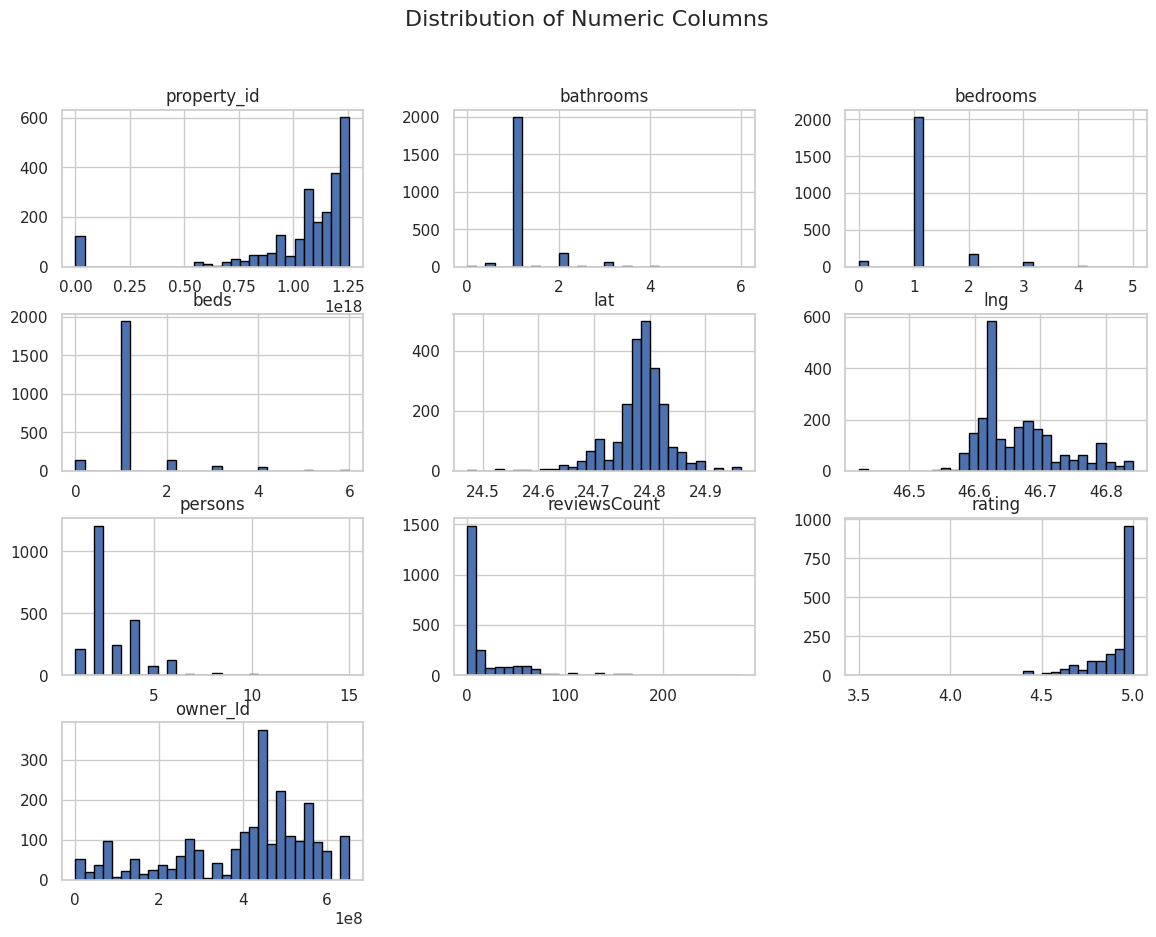


Columns sorted by absolute skewness (higher -> more skewed):


abs_skew
beds          3.076504
bathrooms     3.043773
reviewsCount  3.013291
bedrooms      2.685414
property_id   2.616336
rating        2.241522
persons       2.084423
lat           1.000176
owner_Id      0.857090
lng           0.674411

Suggested columns to try log1p transform (abs skew > 1): ['beds', 'bathrooms', 'reviewsCount', 'bedrooms', 'property_id', 'rating', 'persons', 'lat']


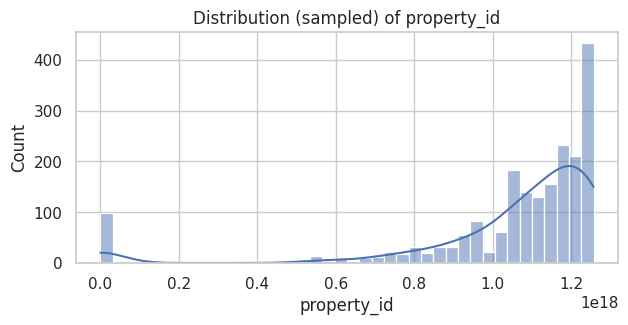

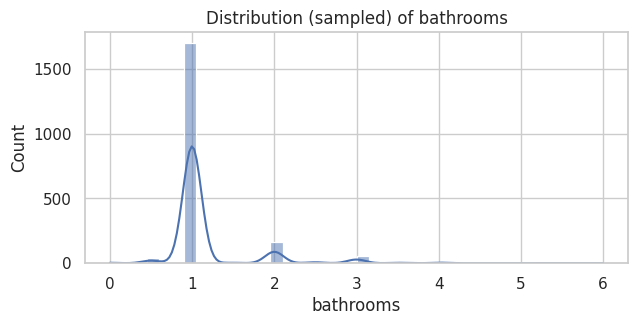

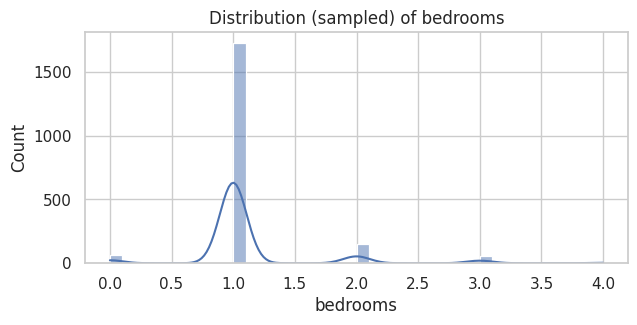

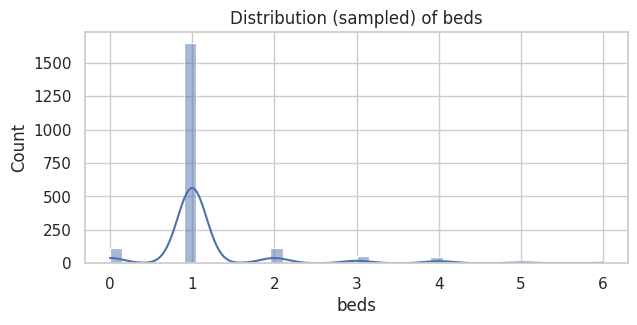

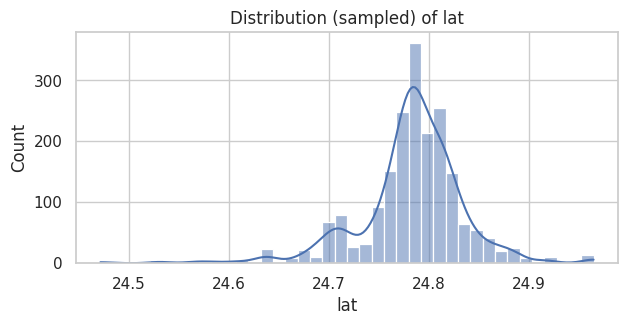

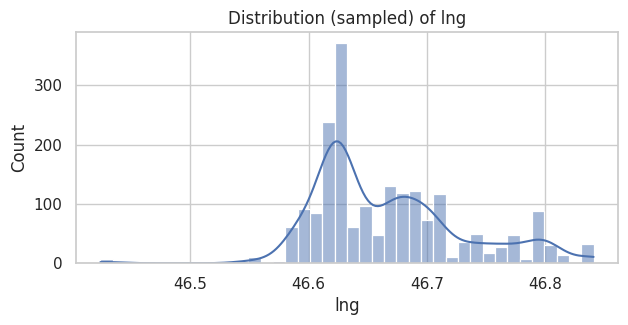

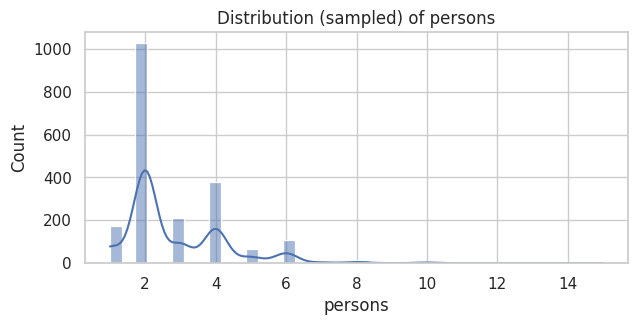

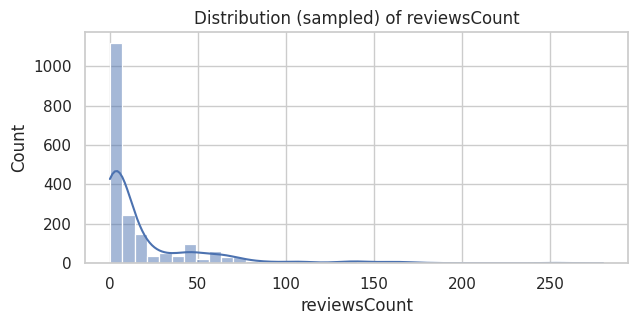

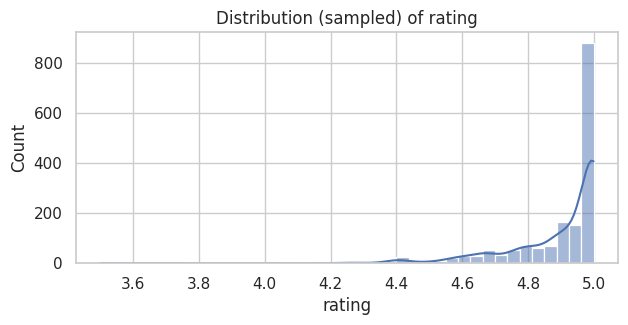

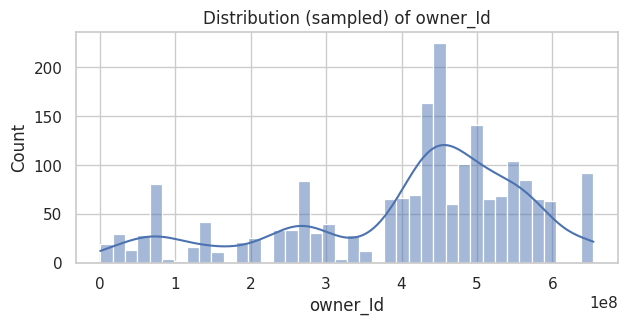

In [7]:
# Distribution of numeric columns (hist + log suggestion)

if numeric_cols:
    Airbnb[numeric_cols].hist(figsize=(14,10), bins=30, edgecolor='black')
    plt.suptitle("Distribution of Numeric Columns", fontsize=16)
    plt.show()

    # calculate skewness and recommend log transform for heavily skewed columns
    skew_info = Airbnb[numeric_cols].skew().abs().sort_values(ascending=False)
    skew_df = pd.DataFrame({'abs_skew': skew_info})
    print("\nColumns sorted by absolute skewness (higher -> more skewed):")
    display(skew_df.head(20))
    # suggest log1p for skew > 1.0
    suggested_log = skew_df[skew_df['abs_skew'] > 1.0].index.tolist()
    if suggested_log:
        print("Suggested columns to try log1p transform (abs skew > 1):", suggested_log)
    else:
        print("No strong skewed numeric columns (abs skew <= 1).")

# KDE per numeric (sample if too many rows)
for col in numeric_cols:
    plt.figure(figsize=(7,3))
    sns.histplot(Airbnb[col].dropna().sample(n=min(2000, Airbnb[col].dropna().shape[0])),
                 kde=True, bins=40)
    plt.title(f"Distribution (sampled) of {col}")
    plt.show()

**Outcome:** Bathrooms & bedrooms are right-skewed; ReviewsCount highly skewed → may require log transformation.

**Outliers Detection (Boxplots)**

- Plot boxplots for numeric columns

- Identify extreme values visually (points outside whiskers)

**Purpose**: Detect outliers that may distort analysis.

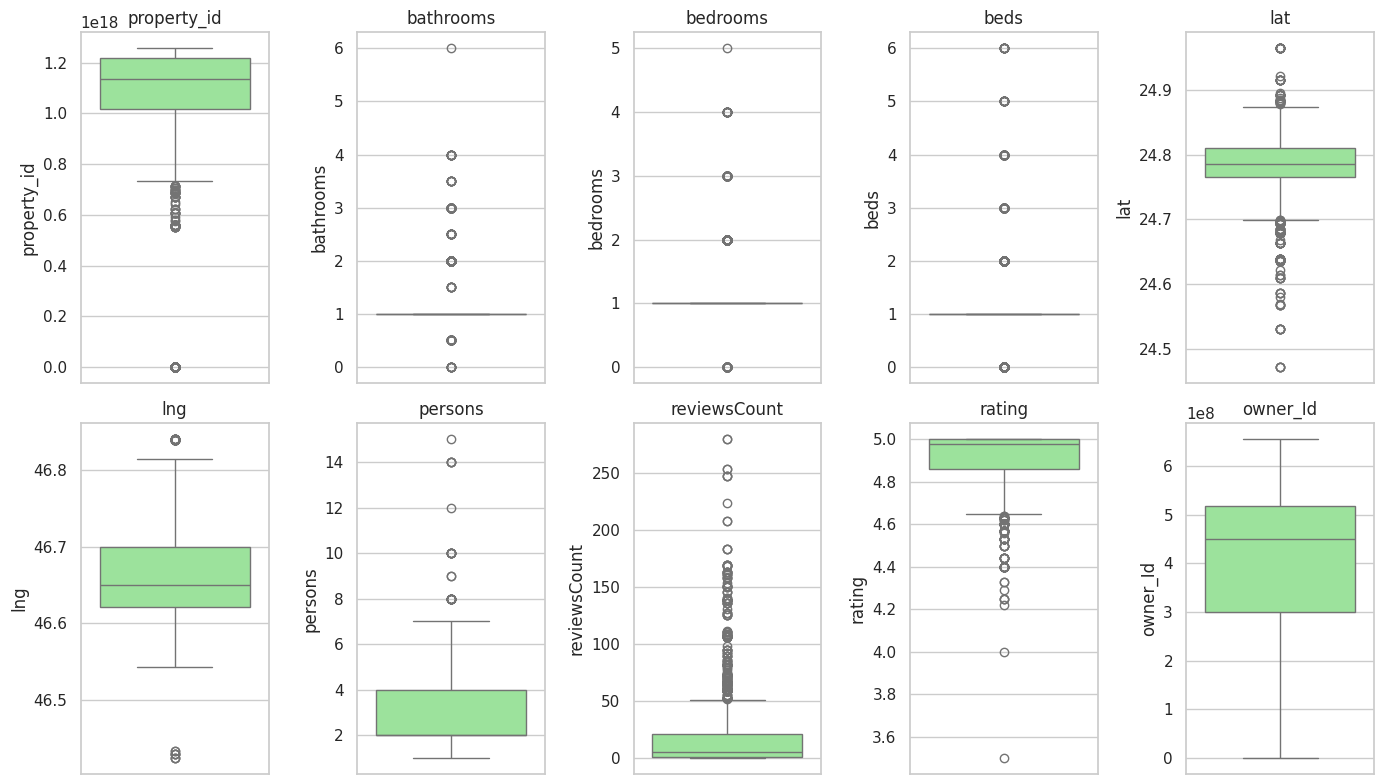

In [8]:
# Outliers detection (boxplots)

plt.figure(figsize=(14,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, int(np.ceil(len(numeric_cols)/2)), i)
    sns.boxplot(y=Airbnb[col].dropna(), color="lightgreen")
    plt.title(col)
plt.tight_layout()
plt.show()

**Outcome:** Extreme outliers in reviewsCount and rating; beds column has unrealistic high values.

**Correlation Heatmap**
- Compute correlation matrix for numeric columns

- Plot heatmap to visualize correlation strength and direction

**Purpose:** Identify relationships between numeric features that can inform feature selection or engineering.

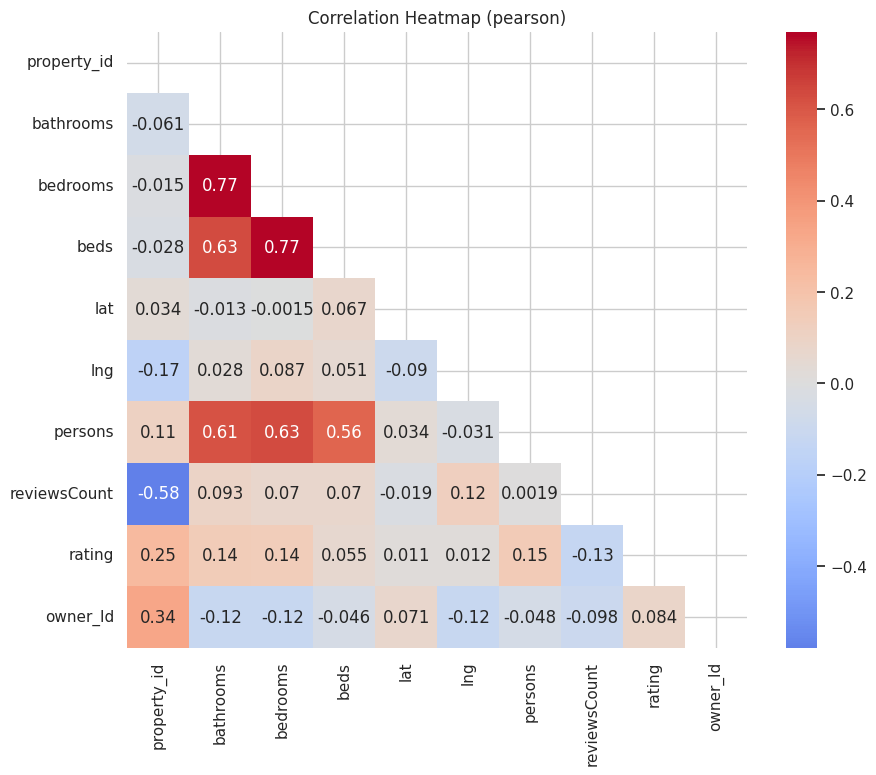

In [9]:
# Correlation heatmap (with mask)

if len(numeric_cols) >= 2:
    corr = Airbnb[numeric_cols].corr(method='pearson')
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, cmap="coolwarm", mask=mask, center=0)
    plt.title("Correlation Heatmap (pearson)")
    plt.show()

**Outcome**: Strong correlation between bedrooms and beds; weak correlation between rating & reviewsCount.


 **Categorical Columns Analysis**
- Plot countplots for categorical columns

- Inspect distribution and frequency of each category

**Purpose:** Understand categorical feature distributions and their potential impact on analysis.


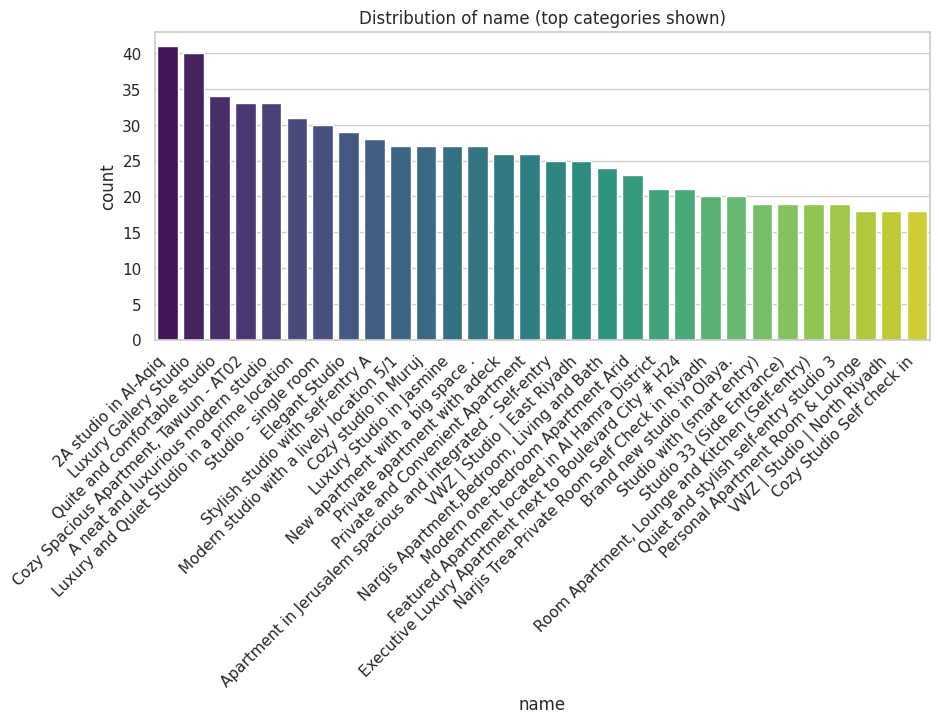

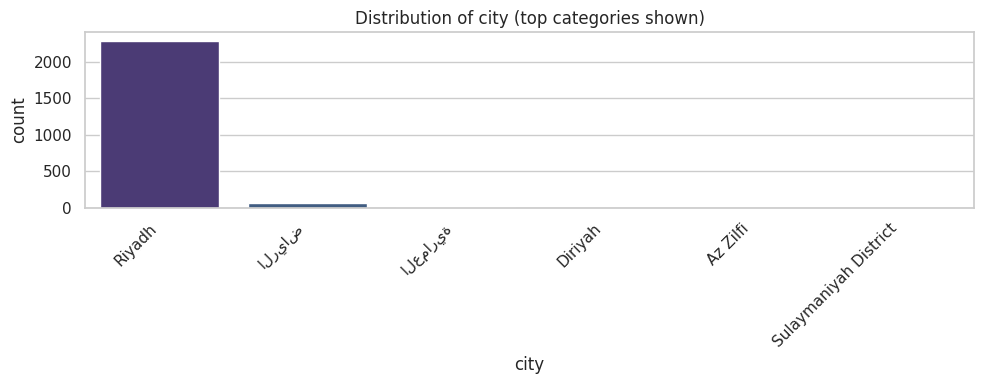

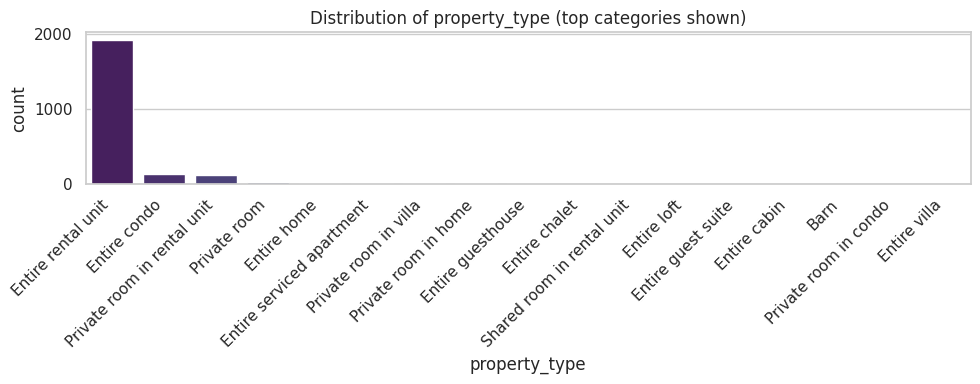

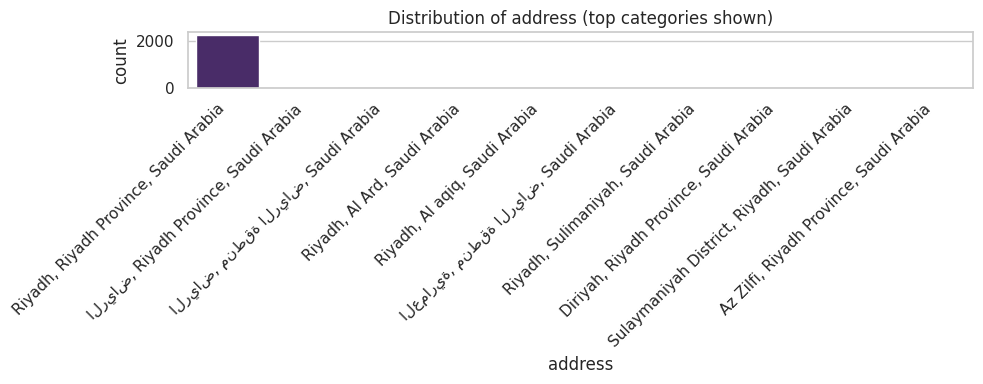

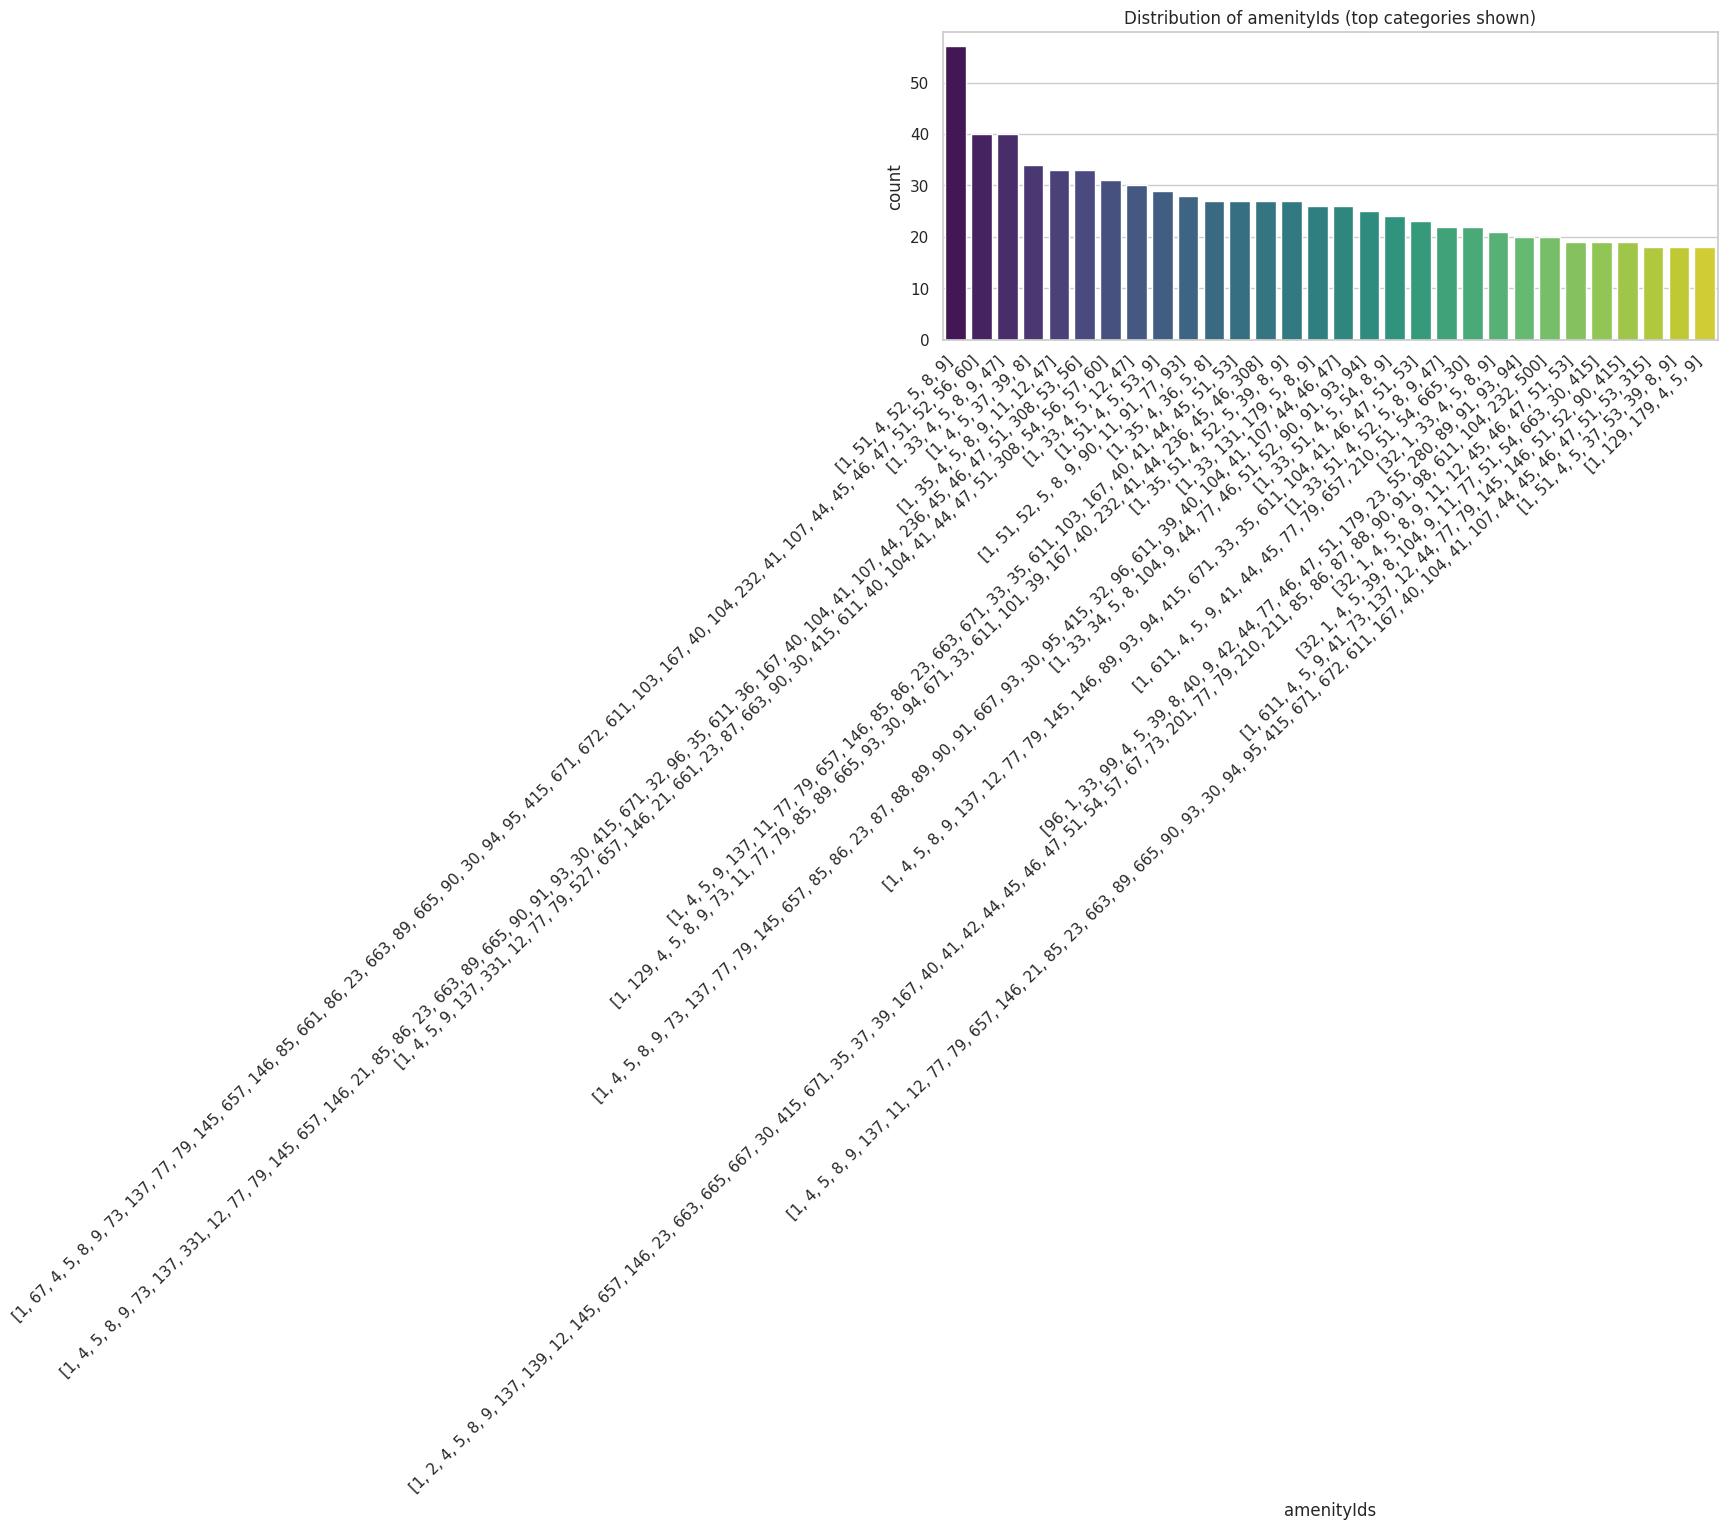

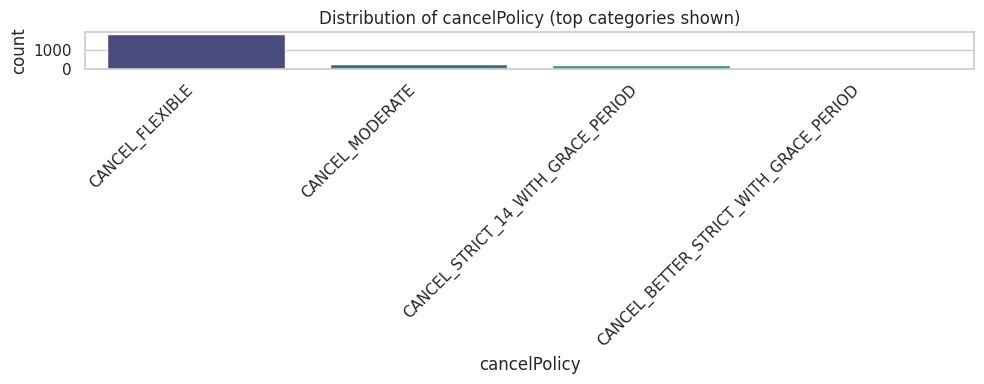

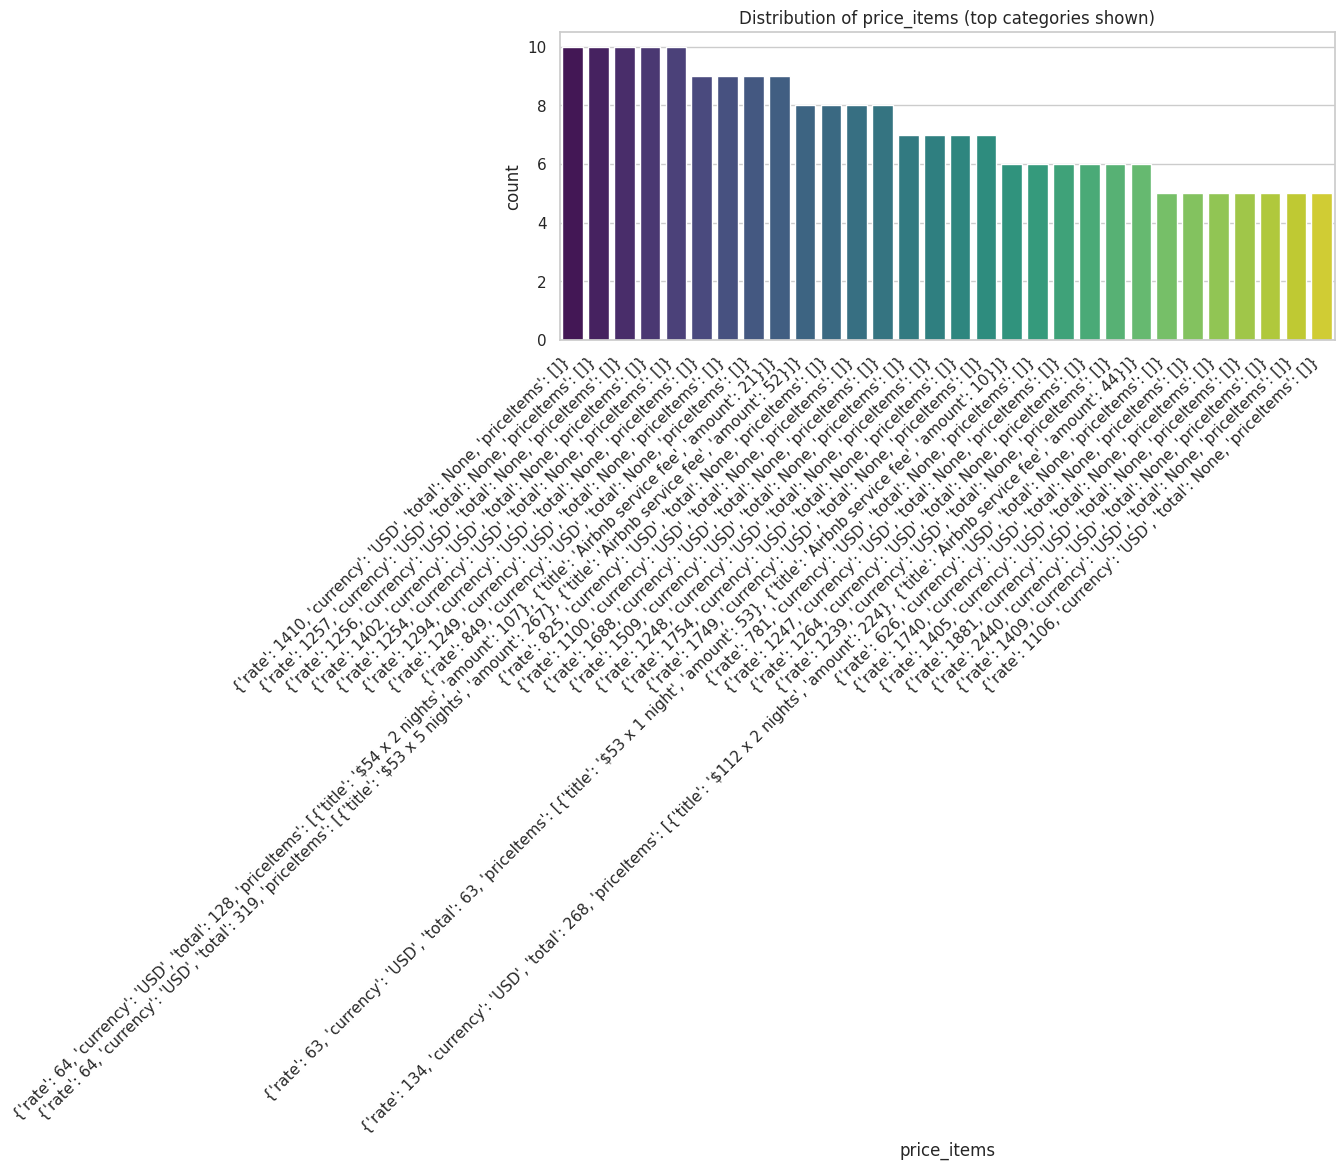

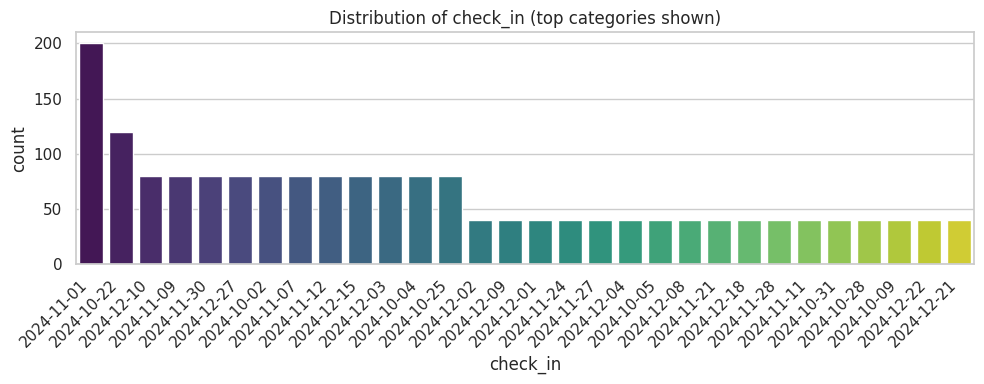

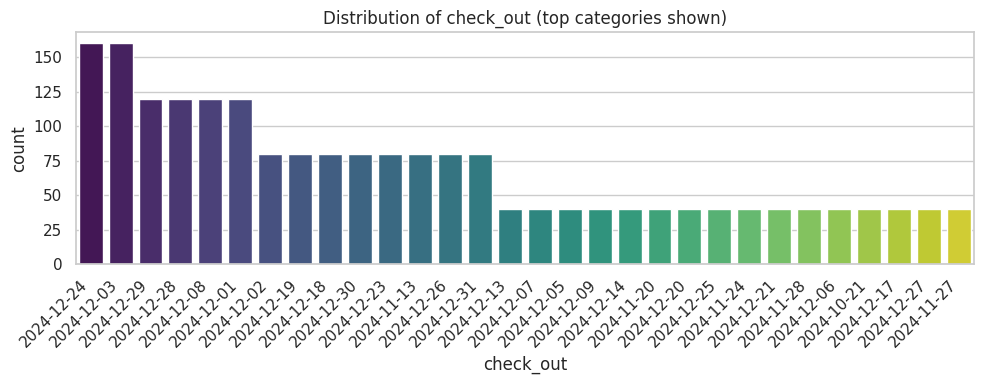

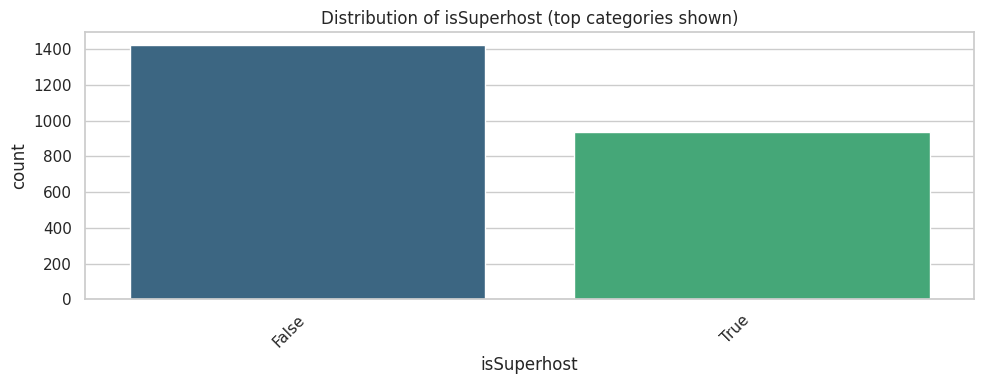

In [10]:
# Categorical Columns Analysis (countplots)

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    order = Airbnb[col].value_counts().index[:30]  # top 30 categories if many
    sns.countplot(data=Airbnb, x=col, order=order, palette='viridis')
    plt.title(f"Distribution of {col} (top categories shown)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Outcome**: Majority listings in Riyadh; Superhosts ratio ~20%; property_type mostly "Apartment".


 **Outliers Detection (IQR vs Z-score)**
- Detect numeric outliers using IQR method

- Detect numeric outliers using Z-score method

- Summarize outlier counts per column

**Purpose:** Statistically identify outliers for potential cleaning.

In [11]:
# Outliers detection: IQR vs Z-score (robust)

def compare_outliers(df, cols, z_thresh=3):
    results = []
    n = df.shape[0]
    for col in cols:
        series = df[col].dropna()
        # IQR method
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        iqr_outliers = ((series < lower) | (series > upper)).sum()
        # Z-score (guard against zero std)
        if series.std() == 0 or series.shape[0] < 2:
            z_outliers = 0
        else:
            z = np.abs(stats.zscore(series))
            z_outliers = (z > z_thresh).sum()
        results.append({
            "Column": col,
            "IQR_Outliers": int(iqr_outliers),
            "IQR_Percent": round(iqr_outliers / n * 100, 3),
            "ZScore_Outliers": int(z_outliers),
            "ZScore_Percent": round(z_outliers / n * 100, 3)
        })
    return pd.DataFrame(results)

outlier_summary = compare_outliers(Airbnb, numeric_cols)
print("\nOutliers Summary (Detection Only):")
display(outlier_summary.sort_values(by='IQR_Percent', ascending=False).reset_index(drop=True))


Outliers Summary (Detection Only):


Column  IQR_Outliers  IQR_Percent  ZScore_Outliers  ZScore_Percent
0          beds           421       17.839               78           3.305
1     bathrooms           358       15.169               90           3.814
2      bedrooms           331       14.025               79           3.347
3  reviewsCount           302       12.797               77           3.263
4           lat           214        9.068               42           1.780
5   property_id           181        7.669              125           5.297
6        rating           116        4.915               40           1.695
7           lng            49        2.076                9           0.381
8       persons            31        1.314               31           1.314
9      owner_Id             0        0.000                0           0.000

**Outcome:** reviewsCount has the highest number of outliers; bathrooms/bedrooms also have some.

# **Data Cleaning & Feature Engineering**

**Missing Values Handling**
- Fill missing numeric values with median
- Fill missing categorical values with 'Unknown'

**Purpose:** Ensure dataset completeness and avoid errors during analysis.

In [12]:
# Missing Values Handling

numeric_cols = ['bathrooms', 'bedrooms', 'beds', 'persons', 'reviewsCount', 'rating']
categorical_cols = ['city', 'property_type', 'cancelPolicy']

# Fill numeric with median
Airbnb[numeric_cols] = Airbnb[numeric_cols].fillna(Airbnb[numeric_cols].median())

# Fill categorical with 'Unknown'
Airbnb[categorical_cols] = Airbnb[categorical_cols].fillna('Unknown')

# Show missing ratio
missing_ratio = Airbnb.isnull().mean()
print("Columns with missing values:\n", missing_ratio[missing_ratio > 0])

Columns with missing values:
 Series([], dtype: float64)


**Outcome:** All missing values in numeric columns filled; categorical columns labeled 'Unknown'.

**Data Type Correction**
- Convert date columns to datetime (check_in, check_out)
- Convert boolean columns (isSuperhost)

**Purpose:** Ensure correct data types for calculations, analysis, and plotting.

In [13]:
# Data Type Correction

# Date columns
for date_col in ['check_in', 'check_out']:
    if date_col in Airbnb.columns:
        Airbnb[date_col] = pd.to_datetime(Airbnb[date_col], errors='coerce')

# Boolean columns
if 'isSuperhost' in Airbnb.columns:
    Airbnb['isSuperhost'] = (
        Airbnb['isSuperhost']
        .astype(str)
        .str.strip()
        .str.lower()
        .map({'true': True, 'false': False, 't': True, 'f': False, '1': True, '0': False})
    )
    Airbnb['isSuperhost'] = Airbnb['isSuperhost'].where(Airbnb['isSuperhost'].notna(), pd.NA)
    Airbnb['isSuperhost'] = Airbnb['isSuperhost'].astype('boolean')

**Outcome:** Date columns converted; boolean column ready for analysis.

**Feature Engineering**
- Create `stay_duration` from `check-in` and `check-out` dates

- Extract `total_price` and components from `price_items`

- Calculate `base_rate_per_night` and `final_price_per_night`

- Count amenities `(amenities_count)` and normalize per person `(amenities_per_person)`

- Add `luxury_flag` based on price threshold

- Categorize amenities into `amenities_category`

**Purpose:** Enhance the dataset with meaningful metrics for analysis and modeling.

In [14]:
# Feature Engineering

# Stay Duration (number of nights)
Airbnb['stay_duration'] = (Airbnb['check_out'] - Airbnb['check_in']).dt.days

# Extract Total Price
def extract_total_price_safe(price):
    if isinstance(price, dict):
        return price.get('total', np.nan)
    try:
        price_dict = json.loads(price.replace("'", '"'))
        return price_dict.get('total', np.nan)
    except:
        return np.nan

Airbnb['total_price'] = Airbnb['price_items'].apply(extract_total_price_safe)

# Extract Price Components (base rate, Airbnb fee, weekly discount)
def extract_price_components(price):
    base_rate = np.nan
    airbnb_fee = np.nan
    weekly_discount = 0

    if isinstance(price, dict):
        items = price.get('priceItems', [])
    else:
        try:
            price_dict = json.loads(price.replace("'", '"'))
            items = price_dict.get('priceItems', [])
        except:
            items = []

    base_rate = sum(item.get('amount', 0) for item in items
                    if 'discount' not in item.get('title', '').lower()
                    and 'airbnb' not in item.get('title', '').lower())
    airbnb_fee = sum(item.get('amount', 0) for item in items
                     if 'airbnb' in item.get('title', '').lower())
    weekly_discount = sum(item.get('amount', 0) for item in items
                          if 'discount' in item.get('title', '').lower())

    return pd.Series([base_rate, airbnb_fee, weekly_discount])

Airbnb[['base_rate_total', 'airbnb_fee', 'weekly_discount']] = Airbnb['price_items'].apply(extract_price_components)

# Price per Night (base & final after discount)
Airbnb['base_rate_per_night'] = Airbnb['base_rate_total'] / Airbnb['stay_duration'].replace(0, np.nan)
Airbnb['final_price_per_night'] = (
    Airbnb['base_rate_per_night'] - Airbnb['weekly_discount'] / Airbnb['stay_duration']
).clip(lower=0)

# Amenities Features
def safe_amenities_count(x):
    if isinstance(x, list):
        return len(x)
    try:
        return len(json.loads(x.replace("'", '"')))
    except:
        return 0

Airbnb['amenities_count'] = Airbnb['amenityIds'].apply(safe_amenities_count)

Airbnb['amenities_per_person'] = Airbnb.apply(
    lambda row: row['amenities_count'] / row['persons'] if row['persons'] > 0 else 0,
    axis=1
)

# Luxury Flag (binary feature)
Airbnb['luxury_flag'] = Airbnb['final_price_per_night'] > 200  # threshold adjustable

# Amenities Category (categorical bins)
Airbnb['amenities_category'] = pd.cut(
    Airbnb['amenities_count'],
    bins=[-1, 5, 15, 50, np.inf],
    labels=['Very Low', 'Low', 'Medium', 'High']
)


**Outcome:** New features added: `stay_duration`, `total_price`, `price_per_night`, `amenities_count`, `amenities_per_person`, `luxury_flag`, `amenities_category`.

**Currency Conversion**
- Convert USD prices to SAR for normalization
- Update all price-related columns (`total_price_SAR`, `base_rate_per_night_SAR`, `final_price_per_night_SAR`)

**Purpose:** Standardize pricing for accurate comparisons.

In [15]:
# Currency Conversion

usd_to_sar = 3.75
Airbnb['total_price_SAR'] = (Airbnb['total_price']*usd_to_sar).round(2)
Airbnb['base_rate_per_night_SAR'] = (Airbnb['base_rate_per_night']*usd_to_sar).round(2)
Airbnb['final_price_per_night_SAR'] = (Airbnb['final_price_per_night']*usd_to_sar).round(2)
Airbnb['currency'] = 'SAR'

**Outcome:** All price columns converted to SAR.

**Standardize City & Address Names**
- Map city names to unified format
- Standardize address names
- Extract `district` from `address` if available

**Purpose:** Ensure consistent location data for analysis and visualization.

In [16]:
# Standardize City & Address

# Mapping different spellings / Arabic names to unified English names
city_mapping = {
    'الرياض': 'Riyadh', 'Riyadh': 'Riyadh',
    'Sulaymaniyah District': 'Riyadh', 'Sulimaniyah': 'Riyadh',
    'العمارية': 'Diriyah', 'Diriyah': 'Diriyah',
    'Az Zilfi': 'Az Zilfi'
}

# Create unified city column
Airbnb['city_unified'] = Airbnb['city'].map(city_mapping)

# Function to unify address by replacing Arabic/variant names with standardized names
def unify_address(address):
    if pd.isnull(address):
        return address
    for original_name, unified_name in city_mapping.items():
        address = address.replace(original_name, unified_name)
    return address

# Apply address standardization
Airbnb['address_unified'] = Airbnb['address'].apply(unify_address)

# Words to ignore when extracting districts
ignore_words = ['Saudi Arabia', 'Province', 'منطقة']
city_list = list(city_mapping.values())

# Extract district from address if possible, fallback = city
def extract_district(address, city_fallback):
    if pd.isnull(address):
        return city_fallback
    parts = [part.strip() for part in address.split(',')]
    district_candidates = [
        part for part in parts
        if part and part not in city_list and not any(word in part for word in ignore_words)
    ]
    return district_candidates[0] if district_candidates else city_fallback

# Create district column
Airbnb['district'] = Airbnb.apply(
    lambda row: extract_district(row['address_unified'], row['city_unified']),
    axis=1
)

**Outcome:** Cities and addresses standardized; district column extracted.

**Outliers Handling**
- Detect extreme numeric values using IQR method (`final_price_per_night`)

**Purpose:** Identify outliers for potential removal or separate analysis.

In [17]:
# Outliers Handling

def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[f'{col}_outlier'] = (df[col] < lower) | (df[col] > upper)
    return df

Airbnb = detect_outliers_iqr(Airbnb, 'final_price_per_night')

**Outcome:** Outliers in numeric columns detected for possible handling before analysis.

**Final Check**
- Review dataset info after cleaning
- Summarize numeric and categorical engineered features

**Purpose:** Confirm dataset is cleaned, features are added, and ready for further analysis or modeling.

In [18]:
# Final Check & Summary

print("\n=== Cleaned Dataset Info ===")
Airbnb.info()

engineered_numeric_cols = [
    "stay_duration", "total_price", "base_rate_total", "airbnb_fee",
    "weekly_discount", "base_rate_per_night", "final_price_per_night",
    "amenities_count", "amenities_per_person", "total_price_SAR",
    "base_rate_per_night_SAR", "final_price_per_night_SAR"
]

print("\n=== Numeric Features Summary ===")
for col in engineered_numeric_cols:
    if col in Airbnb.columns:
        print(f"\n{col} stats:")
        print(Airbnb[col].describe())
    else:
        print(f"\n{col} column does NOT exist.")

engineered_categorical_cols = [
    "luxury_flag", "amenities_category", "city_unified", "district", "isSuperhost"
]

print("\n=== Categorical Features Summary ===")
for col in engineered_categorical_cols:
    if col in Airbnb.columns:
        print(f"\n{col} value counts (including NA):")
        print(Airbnb[col].value_counts(dropna=False))
    else:
        print(f"\n{col} column does NOT exist.")


=== Cleaned Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   property_id                    2360 non-null   int64         
 1   name                           2360 non-null   object        
 2   bathrooms                      2360 non-null   float64       
 3   bedrooms                       2360 non-null   int64         
 4   beds                           2360 non-null   int64         
 5   city                           2360 non-null   object        
 6   isSuperhost                    2360 non-null   boolean       
 7   lat                            2360 non-null   float64       
 8   lng                            2360 non-null   float64       
 9   persons                        2360 non-null   int64         
 10  reviewsCount                   2360 non-null   int64  

**Outcome:** Dataset cleaned; all engineered features verified.


In [19]:
# Save a clean version of the dataset ready for Tableau
Airbnb.to_csv('airbnb_clean_for_tableau.csv', index=False)
print("Clean dataset saved for Tableau!")

Clean dataset saved for Tableau!


# **Analysis**

**Relationships Between Numerical Features**
- Plot scatter plots of numeric features vs final price
- Plot pairplots for deeper insight
- Compute correlation with price

**Purpose:** Explore relationships between numeric features and target price.

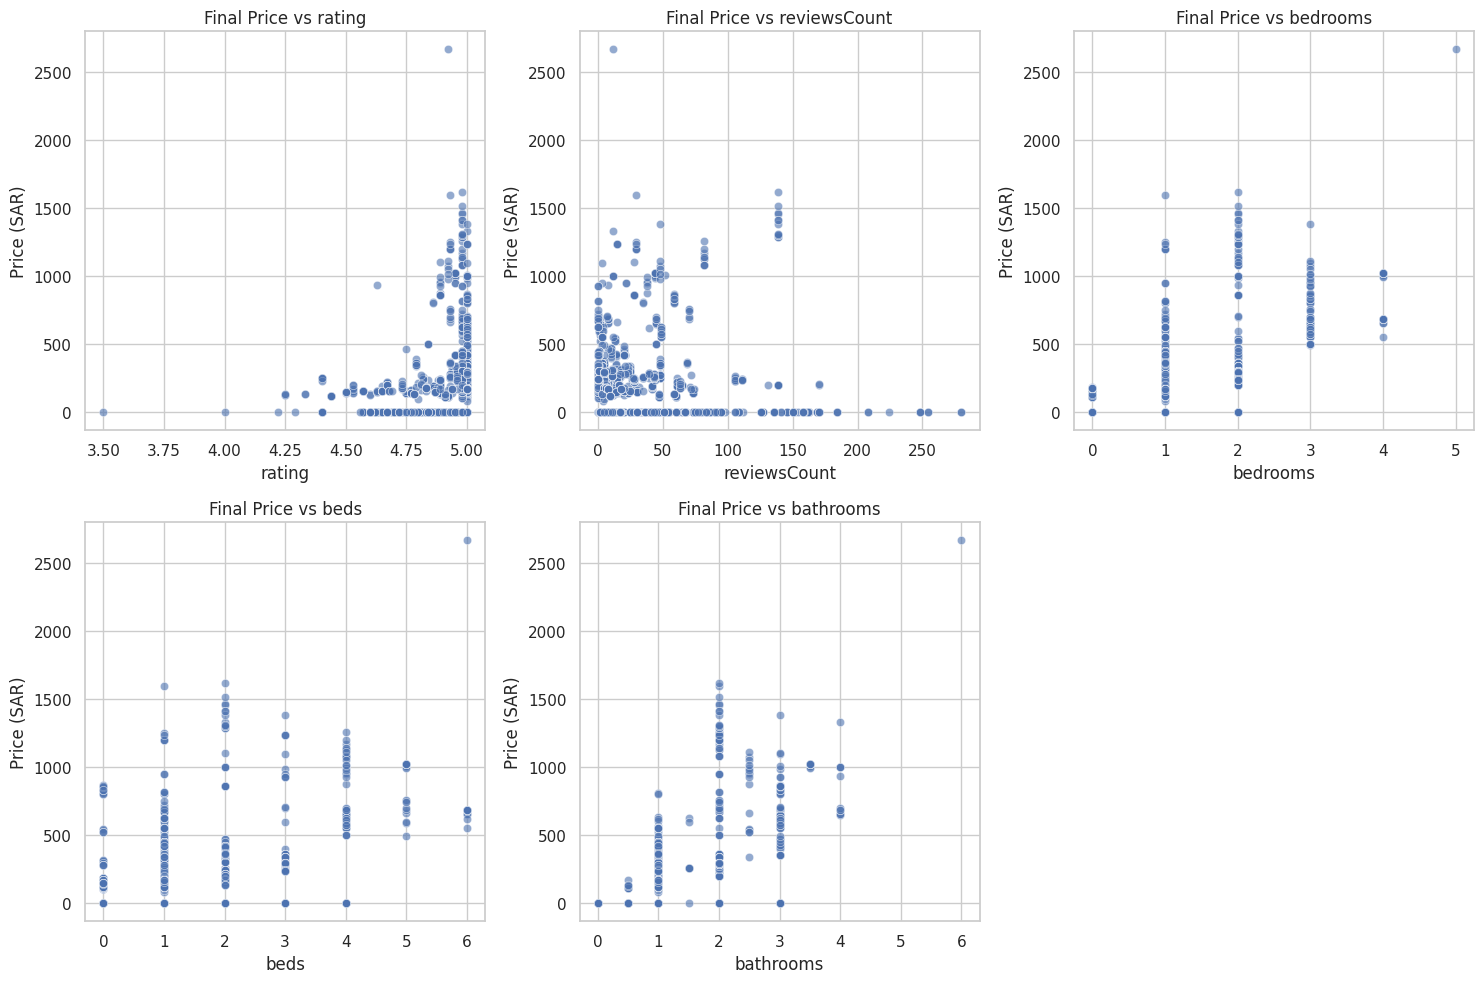

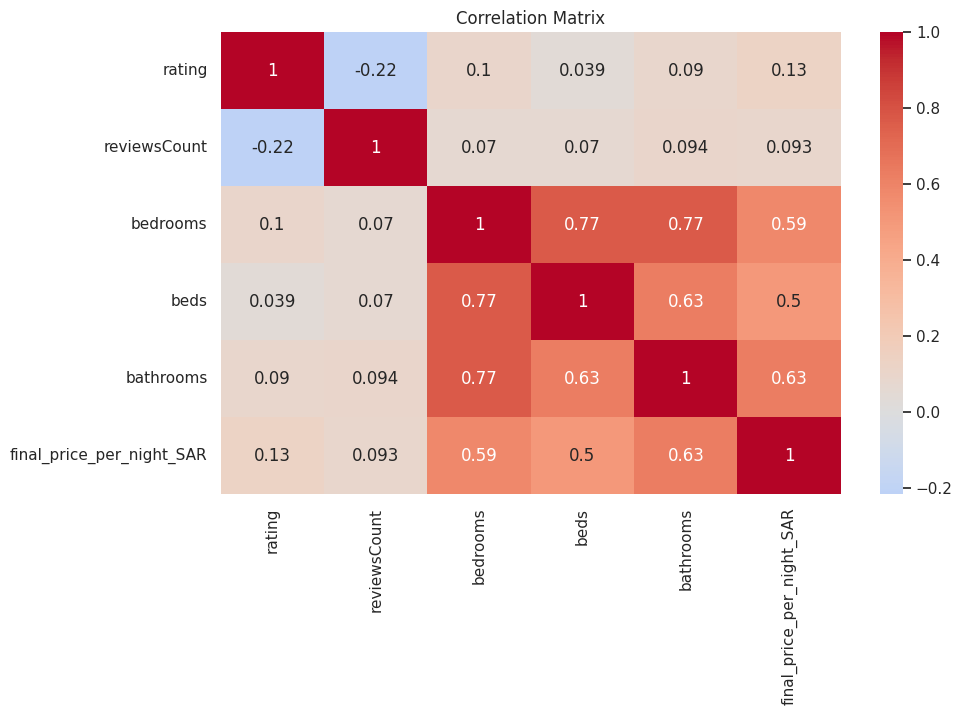

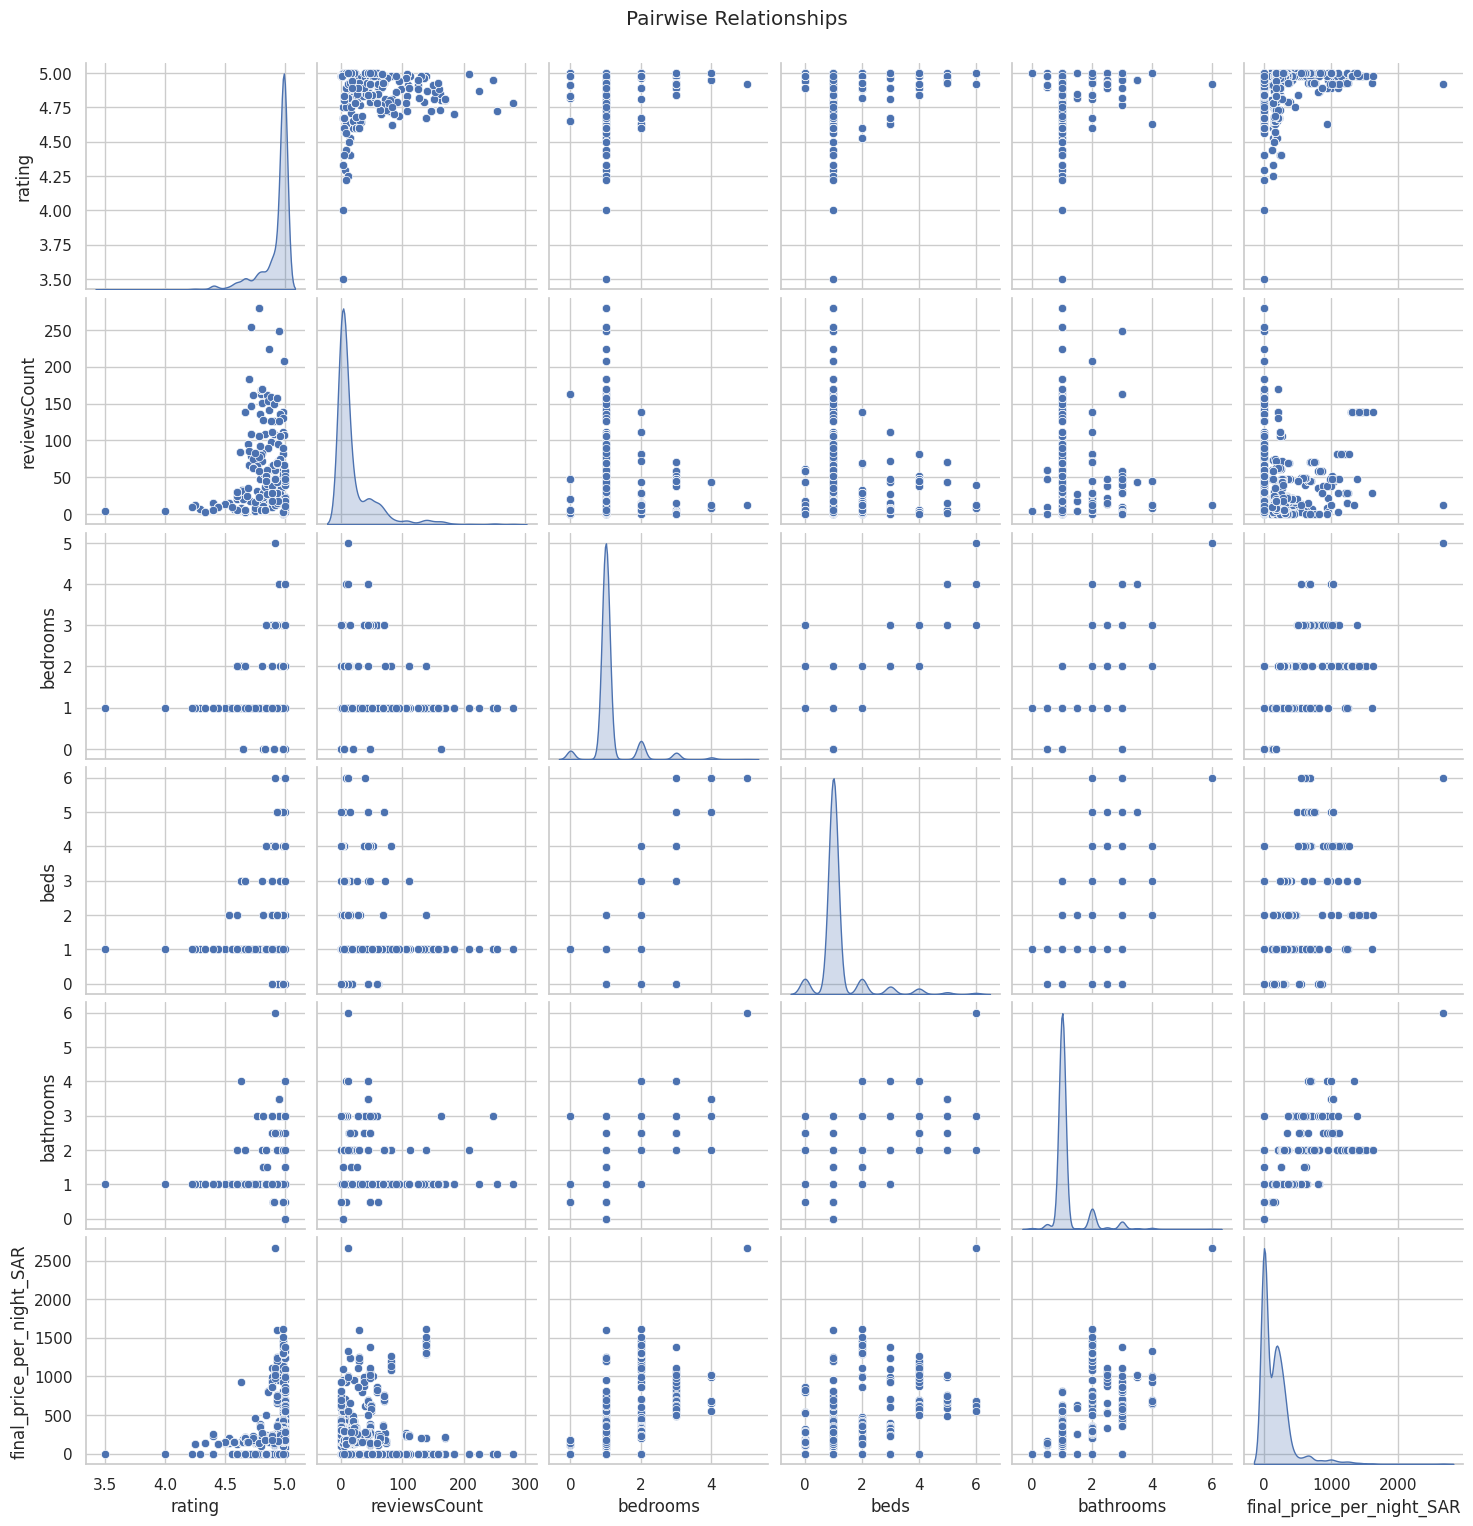

Correlation with Final Price:


final_price_per_night_SAR    1.000000
bathrooms                    0.634033
bedrooms                     0.586714
beds                         0.502275
rating                       0.132379
reviewsCount                 0.092608
Name: final_price_per_night_SAR, dtype: float64

In [21]:
#Relationships Between Numerical Features

numeric_features = ['rating', 'reviewsCount', 'bedrooms', 'beds', 'bathrooms']

# Scatter plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(data=Airbnb, x=col, y='final_price_per_night_SAR', alpha=0.6)
    plt.title(f'Final Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price (SAR)')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(Airbnb[numeric_features + ['final_price_per_night_SAR']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

# Pairplot
sns.pairplot(Airbnb[numeric_features + ['final_price_per_night_SAR']], kind='scatter', diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# Correlation with target
corr_price = Airbnb[numeric_features + ['final_price_per_night_SAR']].corr()['final_price_per_night_SAR'].sort_values(ascending=False)
print("Correlation with Final Price:")
display(corr_price)

**Outcome:** Price positively correlated with bedrooms, beds, bathrooms; less correlation with rating or reviewsCount.

**Categorical Features Analysis**
- Plot countplots for categorical features
- Plot violin plots to visualize price distributions by category
- Compute mean price per category

**Purpose:** Understand impact of categorical variables on price.

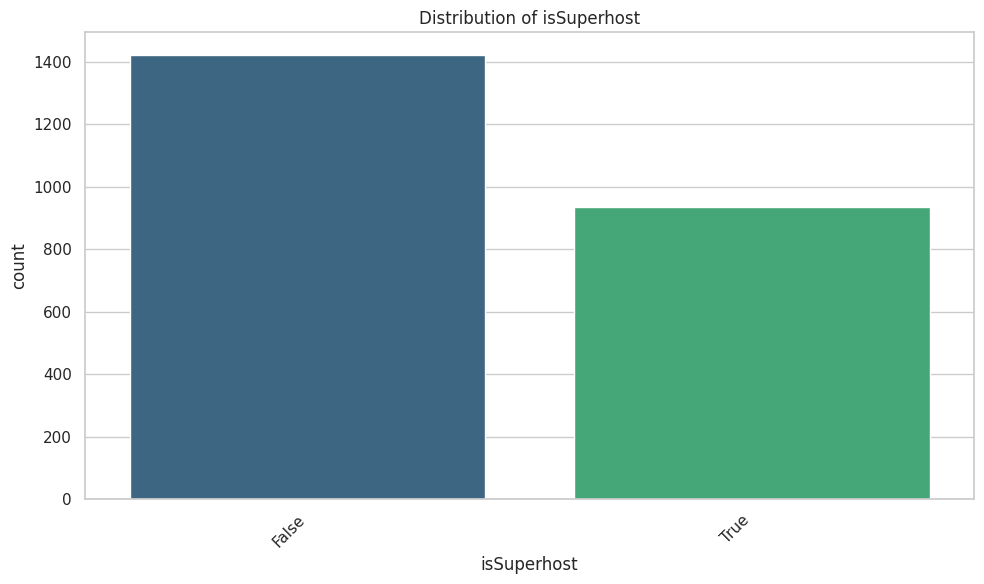

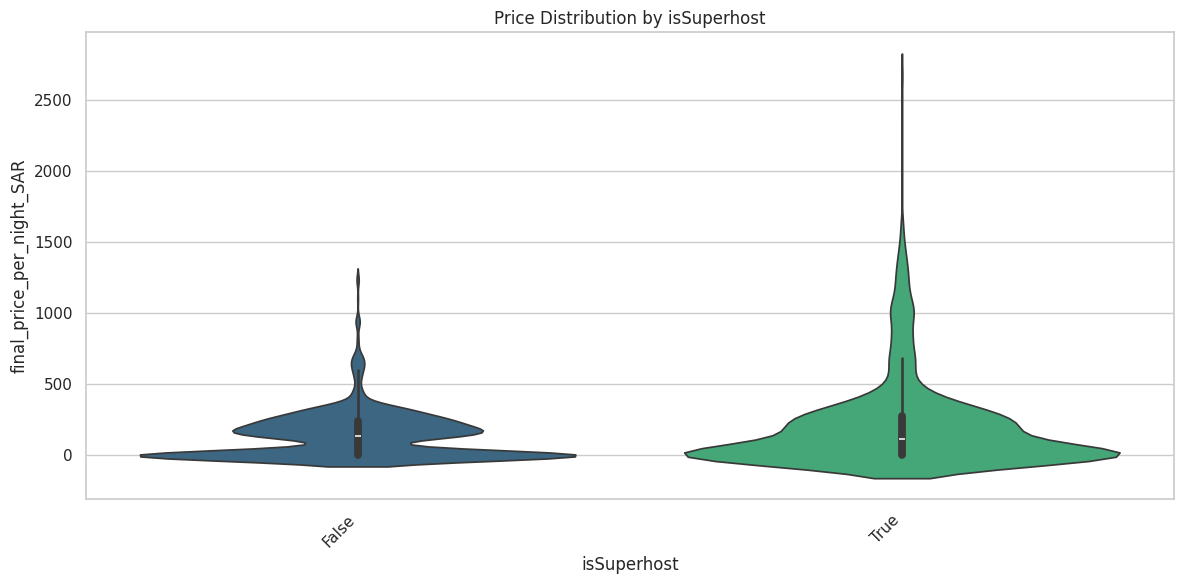

Average Price per isSuperhost:


isSuperhost
True     206.658677
False    139.197554
Name: final_price_per_night_SAR, dtype: float64

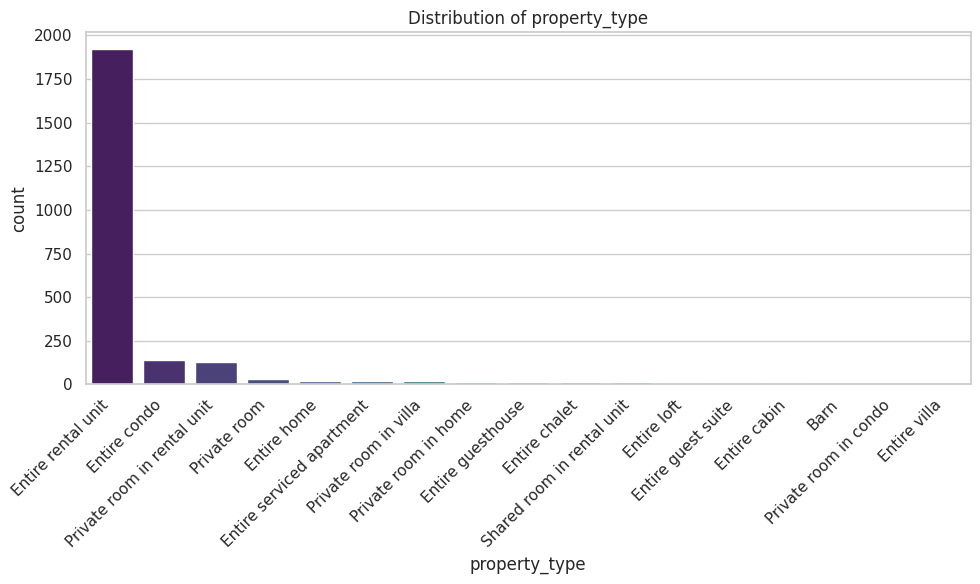

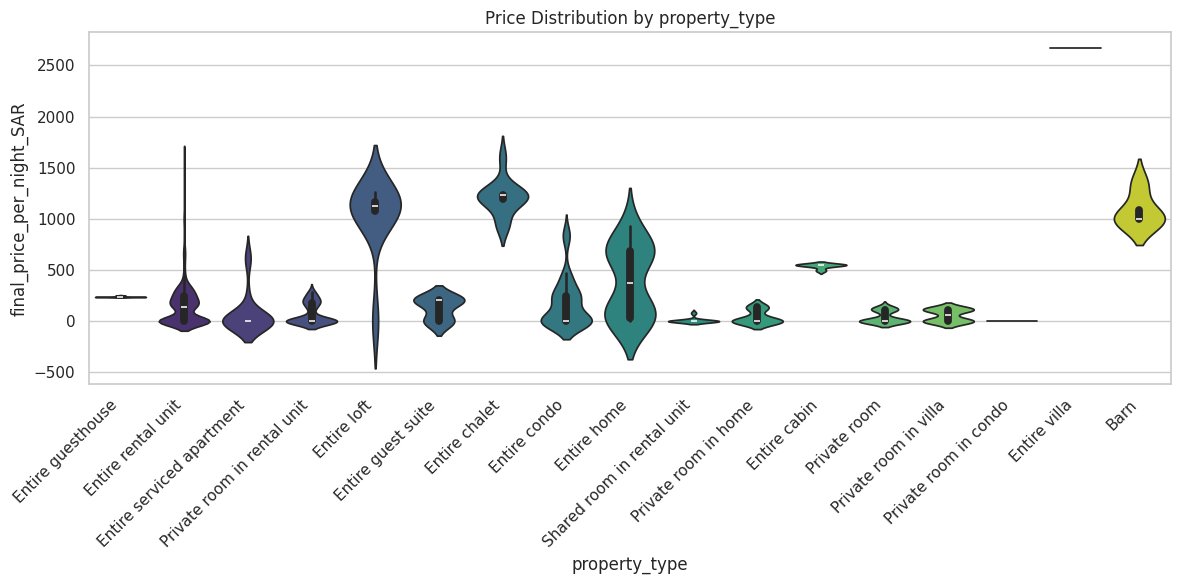

Average Price per property_type:


property_type
Entire villa                   2666.250000
Entire chalet                  1207.385455
Barn                           1082.345000
Entire loft                    1026.750000
Entire cabin                    540.628333
Entire home                     391.631818
Entire guesthouse               238.636667
Entire condo                    177.185182
Entire rental unit              159.791733
Entire guest suite              129.651250
Private room in rental unit      74.228984
Entire serviced apartment        69.648095
Private room in villa            57.072500
Private room                     41.710645
Private room in home             41.538462
Shared room in rental unit        7.266364
Private room in condo             0.000000
Name: final_price_per_night_SAR, dtype: float64

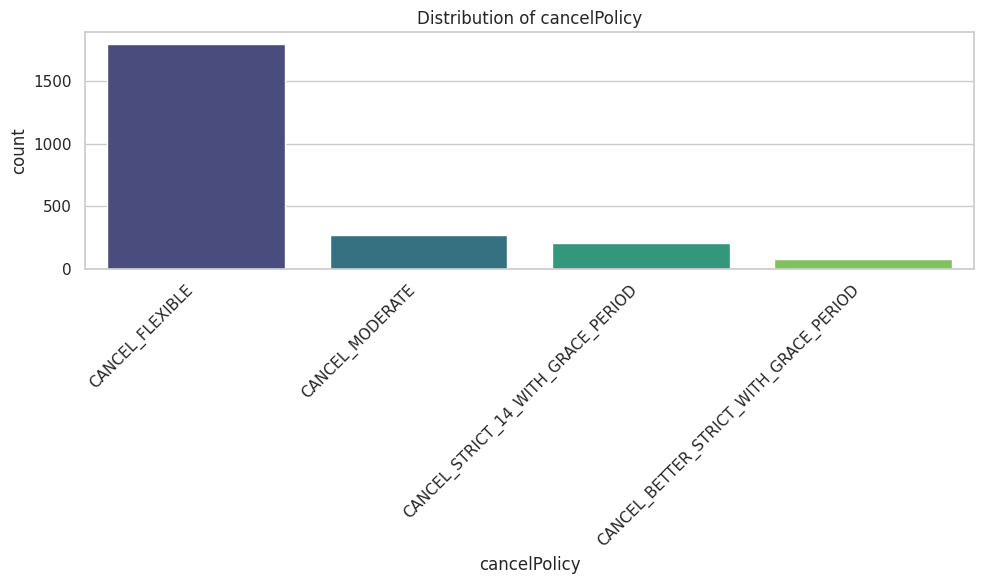

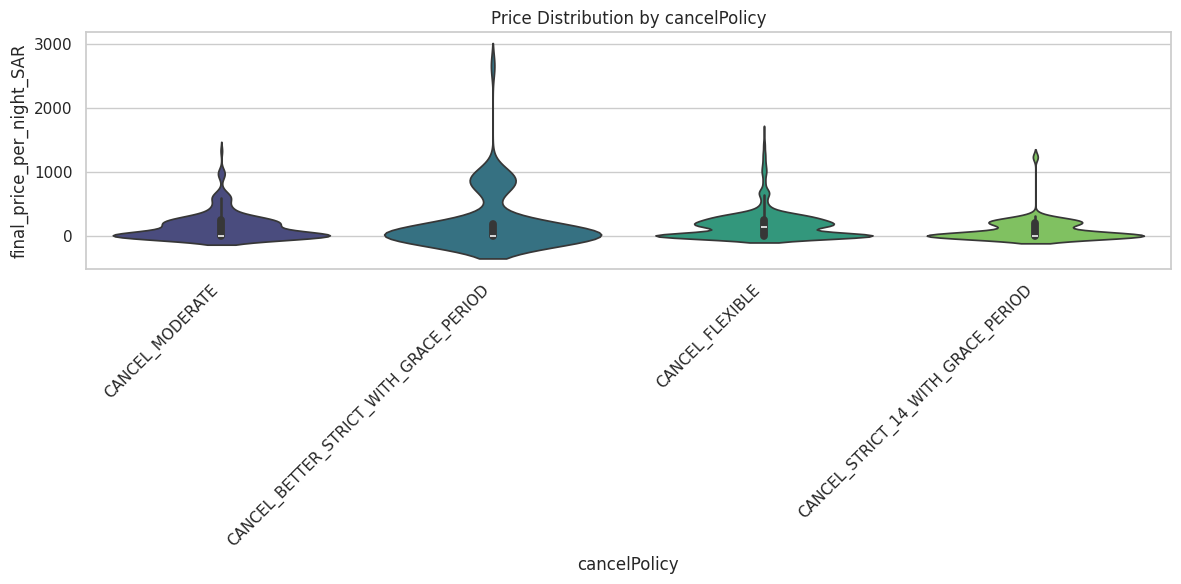

Average Price per cancelPolicy:


cancelPolicy
CANCEL_BETTER_STRICT_WITH_GRACE_PERIOD    207.986220
CANCEL_FLEXIBLE                           174.934212
CANCEL_MODERATE                           151.825219
CANCEL_STRICT_14_WITH_GRACE_PERIOD         91.174211
Name: final_price_per_night_SAR, dtype: float64

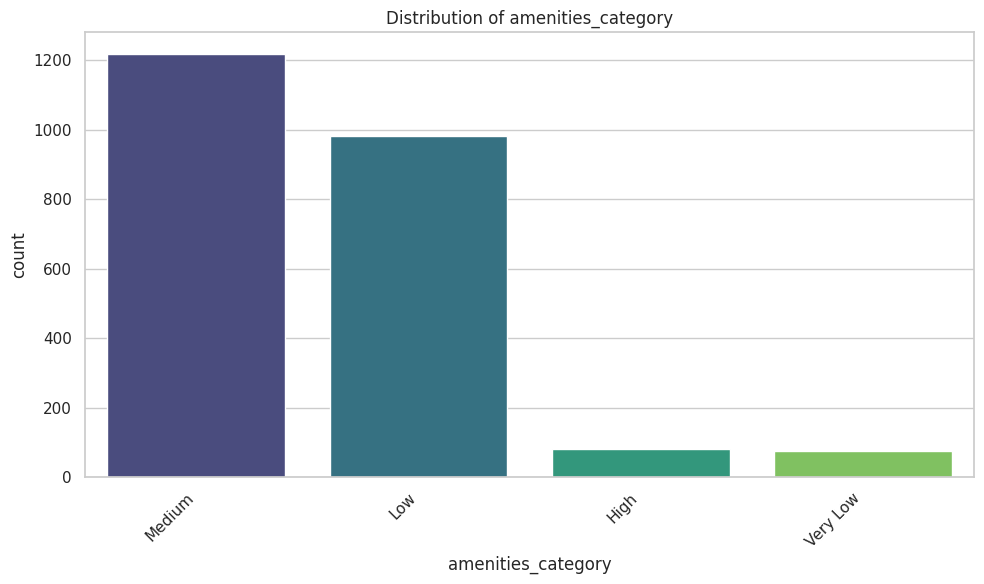

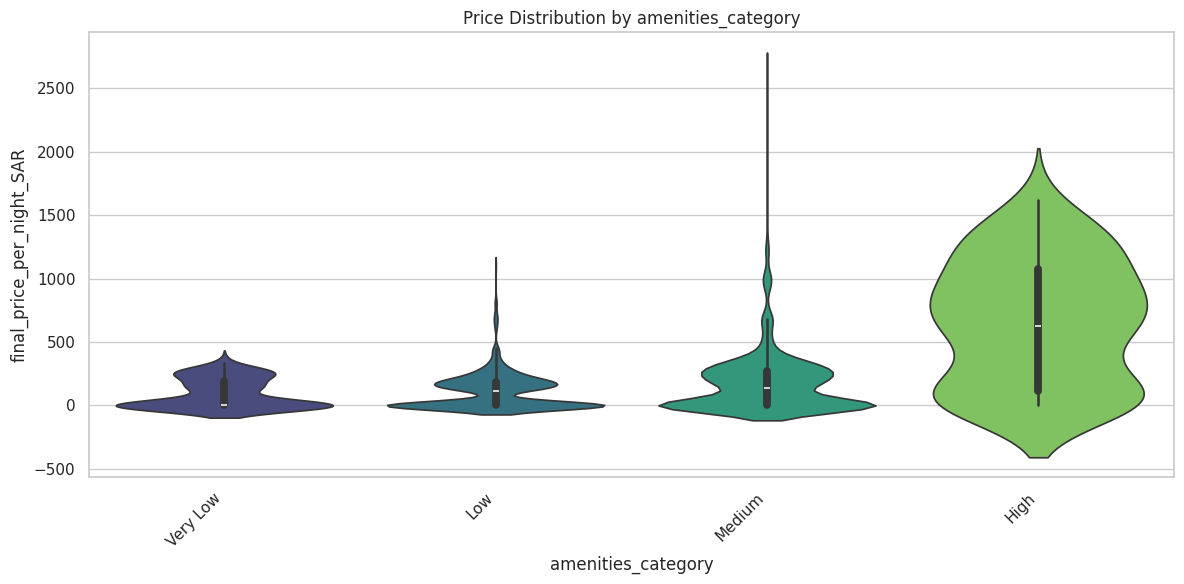

Average Price per amenities_category:


amenities_category
High        654.488025
Medium      181.927205
Low         111.390855
Very Low     95.465395
Name: final_price_per_night_SAR, dtype: float64

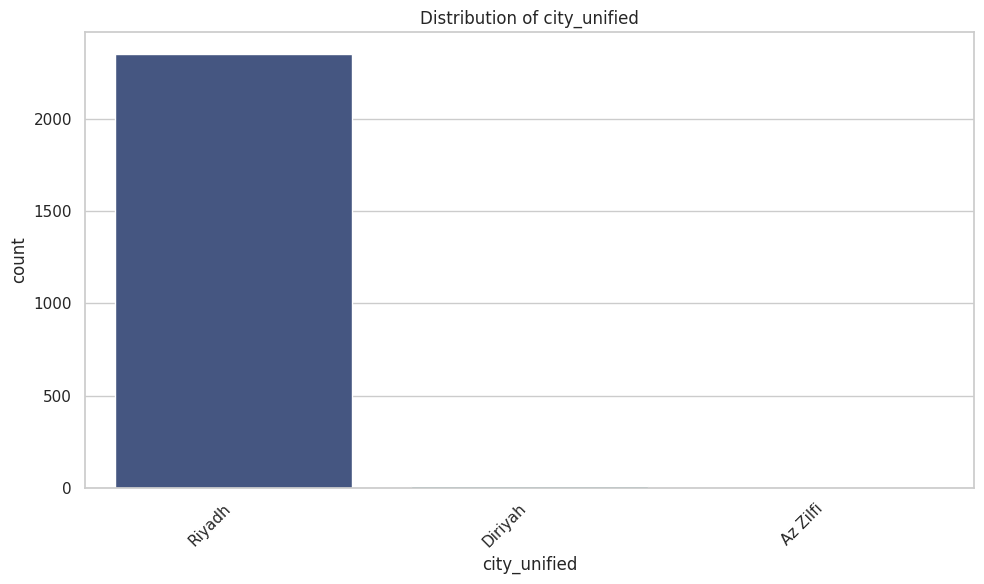

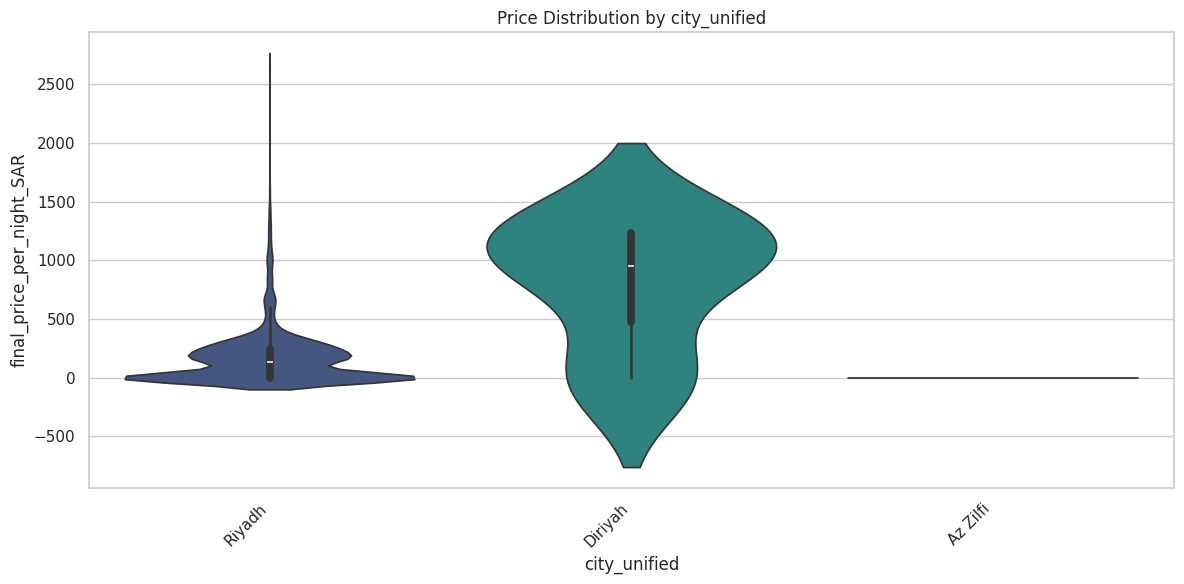

Average Price per city_unified:


city_unified
Diriyah     800.624286
Riyadh      164.163661
Az Zilfi      0.000000
Name: final_price_per_night_SAR, dtype: float64

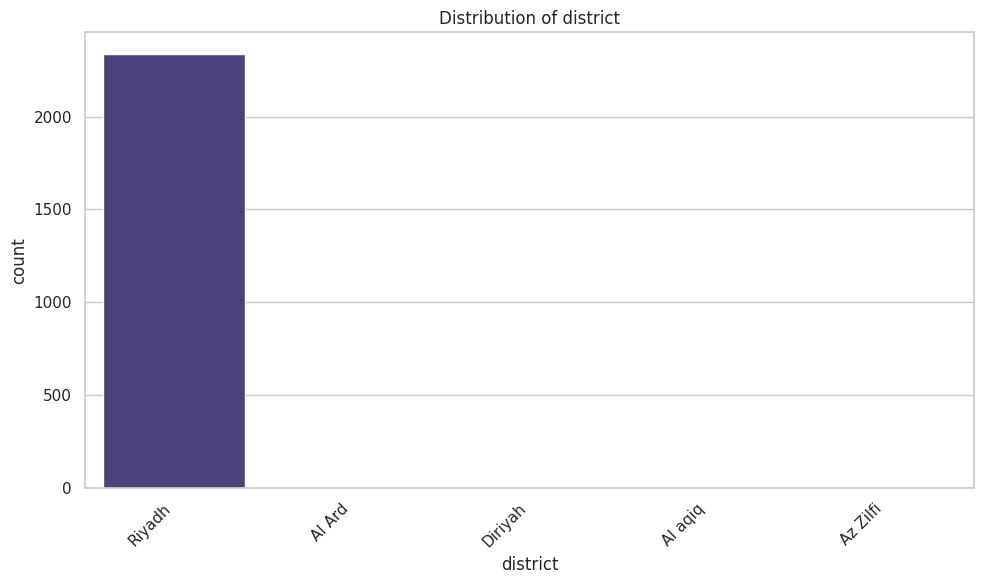

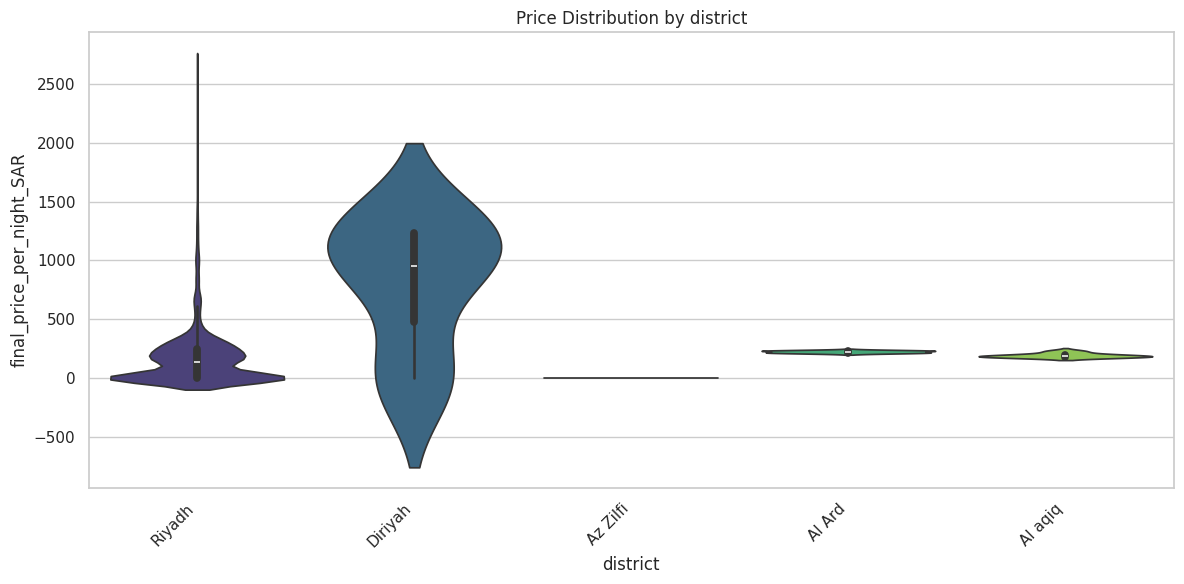

Average Price per district:


district
Diriyah     800.624286
Al Ard      223.418750
Al aqiq     192.412857
Riyadh      163.876205
Az Zilfi      0.000000
Name: final_price_per_night_SAR, dtype: float64

In [22]:
# Categorical Features Analysis

categorical_features = ['isSuperhost', 'property_type', 'cancelPolicy', 'amenities_category', 'city_unified', 'district']

for col in categorical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(data=Airbnb, x=col, palette='viridis', order=Airbnb[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12,6))
    sns.violinplot(data=Airbnb, x=col, y='final_price_per_night_SAR', palette='viridis')
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    mean_price = Airbnb.groupby(col)['final_price_per_night_SAR'].mean().sort_values(ascending=False)
    print(f"Average Price per {col}:")
    display(mean_price)

**Outcome:** Property type, cancellation policy, and location significantly affect price; Superhosts tend to have higher prices.

**Geospatial Analysis**
- Plot property locations with price color coding
- Generate heatmap of prices

**Purpose:** Analyze spatial price patterns in Riyadh.

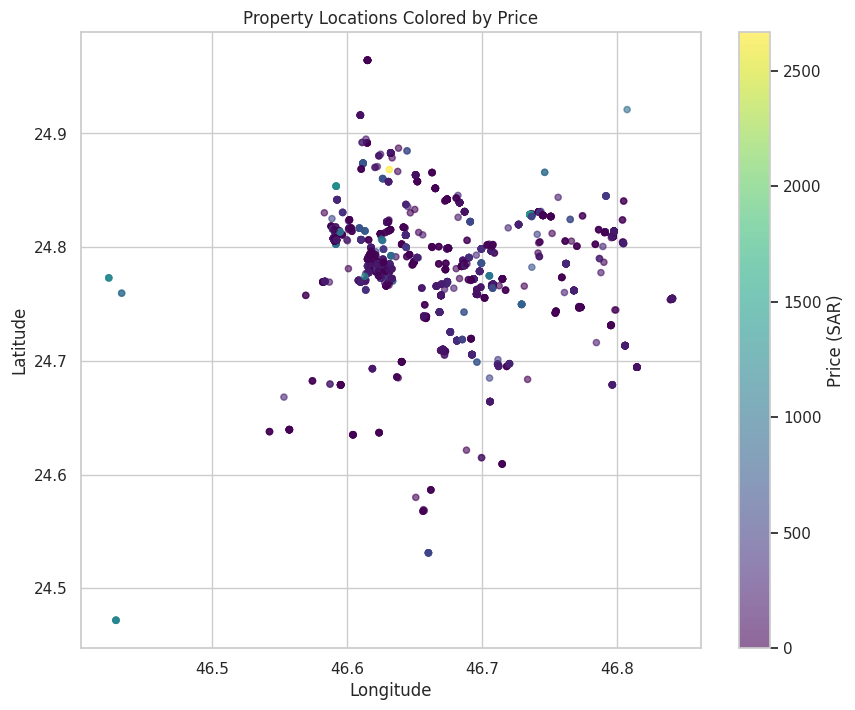

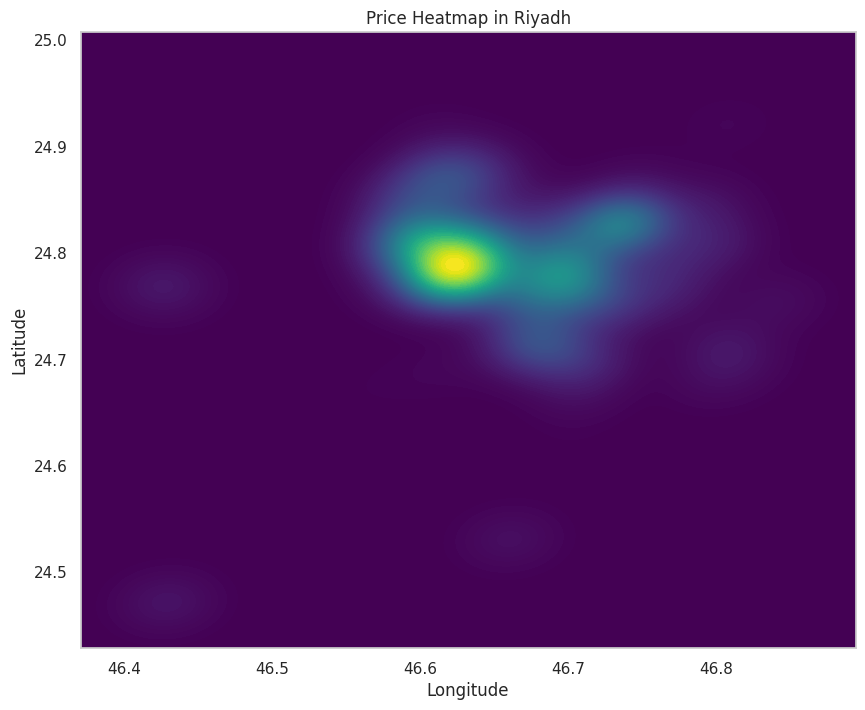

In [23]:
# Geospatial Analysis

plt.figure(figsize=(10, 8))
sc = plt.scatter(
    x=Airbnb['lng'], y=Airbnb['lat'],
    c=Airbnb['final_price_per_night_SAR'], cmap='viridis', alpha=0.6, s=20
)
plt.colorbar(sc, label='Price (SAR)')
plt.title("Property Locations Colored by Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Price density heatmap
plt.figure(figsize=(10,8))
sns.kdeplot(
    x=Airbnb['lng'], y=Airbnb['lat'],
    weights=Airbnb['final_price_per_night_SAR'],
    cmap='viridis', fill=True, thresh=0, levels=100
)
plt.title("Price Heatmap in Riyadh")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

**Outcome:** Prices vary across districts; some areas have higher average prices.

**Time Series Analysis**
- Plot stay duration distribution
- Plot average price per month
- Plot average price per weekday

**Purpose:** Identify temporal patterns and seasonality in pricing.

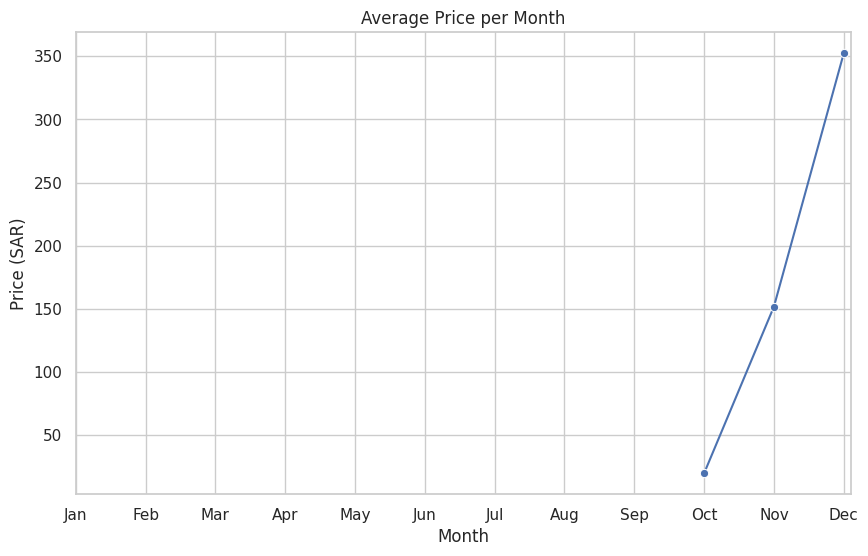

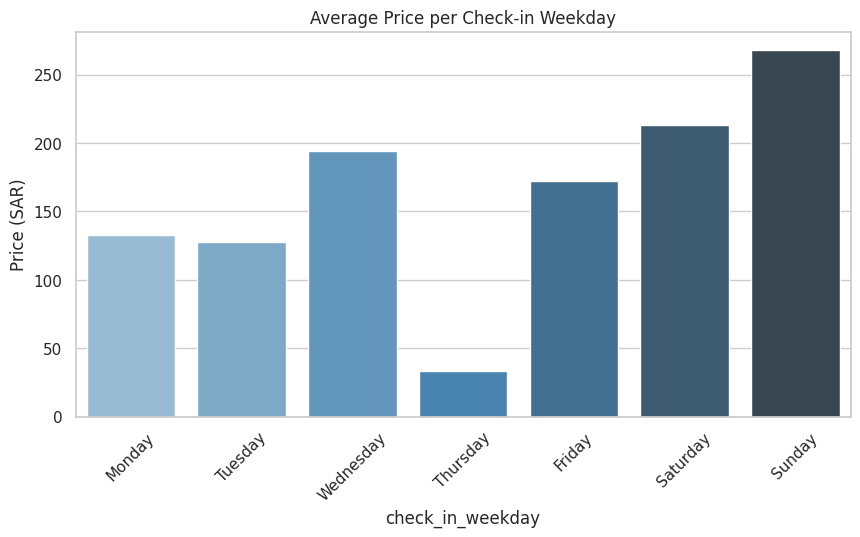

In [24]:
# Time Series Analysis

Airbnb['check_in_month'] = Airbnb['check_in'].dt.month
Airbnb['check_in_weekday'] = Airbnb['check_in'].dt.day_name()

# Average price per month
avg_price_month = Airbnb.groupby('check_in_month')['final_price_per_night_SAR'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_price_month, x='check_in_month', y='final_price_per_night_SAR', marker='o')
plt.title("Average Price per Month")
plt.xlabel("Month")
plt.ylabel("Price (SAR)")
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.show()

# Average price per weekday
avg_price_weekday = Airbnb.groupby('check_in_weekday')['final_price_per_night_SAR'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_weekday.index, y=avg_price_weekday.values, palette='Blues_d')
plt.title("Average Price per Check-in Weekday")
plt.ylabel("Price (SAR)")
plt.xticks(rotation=45)
plt.show()

**Outcome:** Stay durations mostly short; price shows seasonal trends per month and weekday.

**Clustering Analysis**
- Apply KMeans clustering on numeric features
- Visualize clusters with PCA
- Examine cluster characteristics and counts

**Purpose:** Identify distinct groups of properties for segmentation and insights.

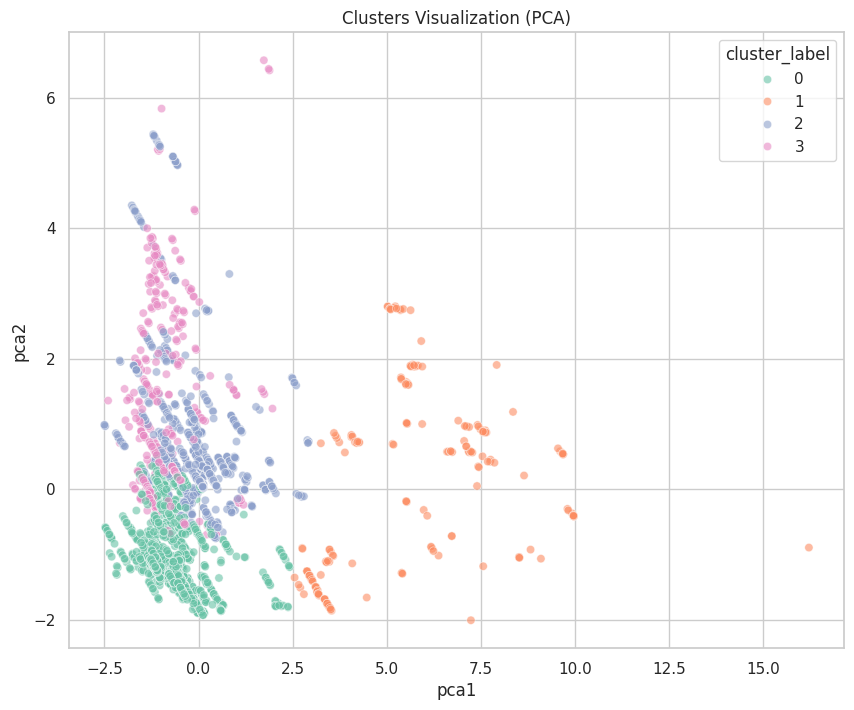

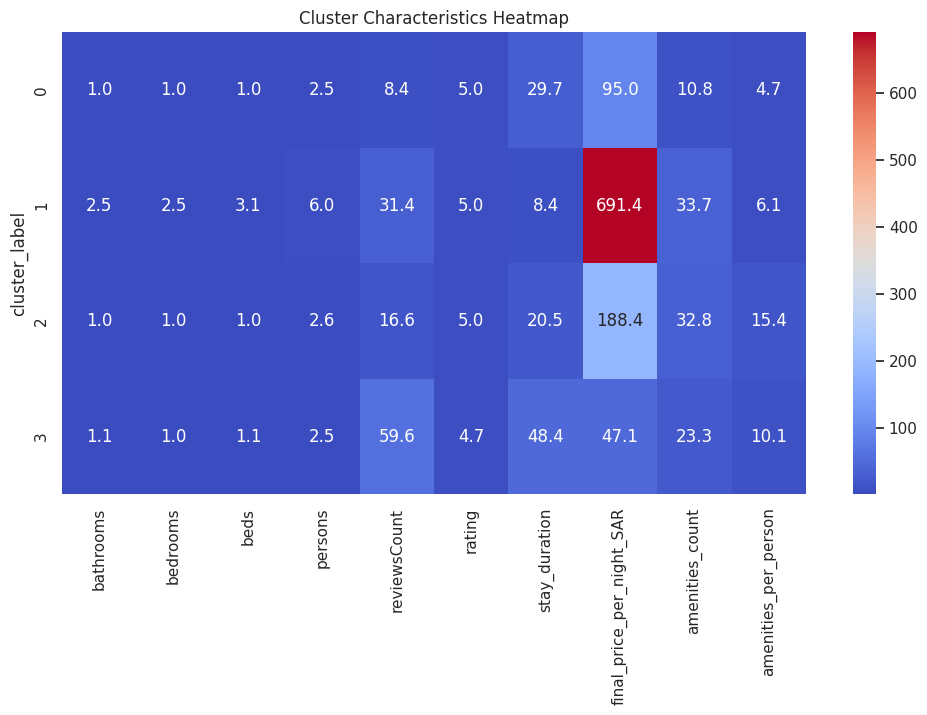

In [25]:
# Advanced Analysis: Clustering

features_for_clustering = [
    'bathrooms', 'bedrooms', 'beds', 'persons', 'reviewsCount',
    'rating', 'stay_duration', 'final_price_per_night_SAR',
    'amenities_count', 'amenities_per_person'
]

Airbnb[features_for_clustering] = Airbnb[features_for_clustering].fillna(Airbnb[features_for_clustering].median())
scaler = StandardScaler()
scaled_features = scaler.fit_transform(Airbnb[features_for_clustering])

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
Airbnb['cluster_label'] = kmeans.fit_predict(scaled_features)

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
Airbnb['pca1'] = pca_features[:,0]
Airbnb['pca2'] = pca_features[:,1]

plt.figure(figsize=(10,8))
sns.scatterplot(data=Airbnb, x='pca1', y='pca2', hue='cluster_label', palette='Set2', alpha=0.6)
plt.title("Clusters Visualization (PCA)")
plt.show()

# Cluster heatmap
plt.figure(figsize=(12,6))
sns.heatmap(Airbnb.groupby('cluster_label')[features_for_clustering].mean(), annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Cluster Characteristics Heatmap")
plt.show()


**Outcome:** Four property clusters identified:

- Cluster 0: high reviews, long stays
- Cluster 1: larger, higher price, short stays
- Cluster 2: low reviews, few amenities
- Cluster 3: moderate characteristics

**Data Analysis Summary & Insights**

**Overview / Purpose:**

Summarize key findings from the exploratory data analysis (EDA) and advanced analyses.
- Highlight which features, patterns, and relationships drive Airbnb prices.
- Provide actionable insights and recommendations for next steps.

**Key Findings / Outcome:**
Price Correlations

Positive correlation with property size indicators: bedrooms, beds, and bathrooms.

Larger properties generally have higher prices.

**Rating & Reviews**

Weak or unclear relationship between price and rating or reviewsCount.
Suggests that guest feedback alone is not a primary price driver.

**Categorical Features Impact**

Features like property_type, cancelPolicy, and location (city_unified, district) significantly affect the final price per night.

Certain property types and districts consistently command higher prices.

**Geospatial Analysis**

Price distribution varies across Riyadh; some districts show higher average prices than others.

Useful for location-based pricing strategies.

**Time Series & Stay Patterns**

Stay duration distribution shows most bookings are short-term.

Average price per night demonstrates seasonality, with higher prices in certain months or weekdays.

**Clustering Analysis**

Four distinct property clusters identified:

Cluster 0: High reviews, long stay duration

Cluster 1: Larger, higher price, highest rating, shortest stay duration

Cluster 2: Lowest reviews and amenities

Cluster 3: Moderate characteristics

Clusters can help with segmentation, targeted marketing, and understanding competitive landscape.

**Insights / Next Steps / Outcome:**

Outliers in pricing should be further investigated to determine their influence on analysis and modeling.

Clustering results can be leveraged for:

Tailored marketing campaigns

Pricing strategies for different property segments

Better understanding of Airbnb market dynamics in Riyadh

Consider combining insights with predictive modeling (e.g., Random Forest + SHAP) to quantify feature impact on price more accurately.

# **Predictive Modeling**

**Modeling Overview**
- Define target (final_price_per_night_SAR) and features
- Split dataset into training and testing sets
- Apply preprocessing (scaling, encoding) and RandomForestRegressor
- Evaluate model (MAE, RMSE, R²)
- Perform hyperparameter tuning with RandomizedSearchCV

**Purpose:** Build and tune predictive model for property price prediction.


In [26]:
# Target & Features

target = 'final_price_per_night_SAR'

numeric_features = [
    'bedrooms', 'bathrooms', 'beds', 'persons', 'reviewsCount',
    'rating', 'stay_duration', 'amenities_count', 'amenities_per_person'
]

categorical_features = ['isSuperhost', 'property_type', 'district', 'cancelPolicy']

# Prepare data
df_model = Airbnb.dropna(subset=[target]).copy()
X = df_model[numeric_features + categorical_features].copy()
y = df_model[target].copy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
# Preprocessing + Pipeline

preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_features),

    #Add OneHotEncoder with handle_unknown='ignore'
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
])

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])

# Fit the model
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)

# Initial Model Evaluation

print("Initial Model Performance:")
print("MAE:", mean_absolute_error(y_test, preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
print("R2:", r2_score(y_test, preds))

Initial Model Performance:
MAE: 13.606263901331712
RMSE: 85.65928252110908
R2: 0.8904220221384953


In [28]:
# Hyperparameter Tuning

param_dist = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [None, 10, 20, 40],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 0.5],
    'model__bootstrap': [True, False]
}

rs = RandomizedSearchCV(
    pipe, param_distributions=param_dist, n_iter=20, cv=5,
    scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42
)
rs.fit(X_train, y_train)

best_model = rs.best_estimator_
preds_best = best_model.predict(X_test)

print("\nTuned Model Performance:")
print("Best Params:", rs.best_params_)
print("MAE:", mean_absolute_error(y_test, preds_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, preds_best)))
print("R2:", r2_score(y_test, preds_best))


Tuned Model Performance:
Best Params: {'model__n_estimators': 500, 'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'model__max_features': 0.5, 'model__max_depth': 40, 'model__bootstrap': False}
MAE: 13.765920623390238
RMSE: 85.77453043163888
R2: 0.8901269664705274


**Outcome:** Initial and tuned model trained; performance metrics calculated; best hyperparameters identified.

**Feature Importance & SHAP Analysis**

**Overview / Purpose:**
- Determine which features have the most influence on the predicted Airbnb price.
- RandomForestRegressor provides feature importance scores based on how much each feature decreases impurity.
- SHAP (SHapley Additive exPlanations) gives a more detailed, interpretable view of each feature's impact on individual predictions and overall model output.

Feature Importances:


stay_duration                                      4.090177e-01
bathrooms                                          1.958901e-01
bedrooms                                           9.445671e-02
reviewsCount                                       8.588554e-02
amenities_count                                    5.151900e-02
amenities_per_person                               4.029386e-02
beds                                               3.095307e-02
property_type_Entire chalet                        2.582227e-02
persons                                            2.400382e-02
rating                                             1.728145e-02
isSuperhost_1.0                                    9.287044e-03
property_type_Entire rental unit                   4.580149e-03
property_type_Entire cabin                         1.954211e-03
cancelPolicy_CANCEL_FLEXIBLE                       1.911619e-03
cancelPolicy_CANCEL_MODERATE                       1.616902e-03
district_Diriyah                                   1.182526e-03
district_Riyadh                                    1.155356e-03
property_type_Entire loft                          9.297555e-04
cancelPolicy_CANCEL_STRICT_14_WITH_GRACE_PERIOD    8.236979e-04
property_type_Entire condo                         6.127246e-04
property_type_Private room in rental unit          2.008674e-04
property_type_Entire serviced apartment            1.898878e-04
property_type_Entire home                          1.793963e-04
property_type_Private room                         1.010565e-04
property_type_Private room in home                 4.375505e-05
property_type_Private room in villa                4.196238e-05
property_type_Entire guesthouse                    3.086871e-05
district_Al aqiq                                   1.798879e-05
property_type_Entire guest suite                   1.673048e-05
property_type_Shared room in rental unit           4.156097e-18
property_type_Private room in condo                3.322876e-18
district_Az Zilfi                                  0.000000e+00
dtype: float64

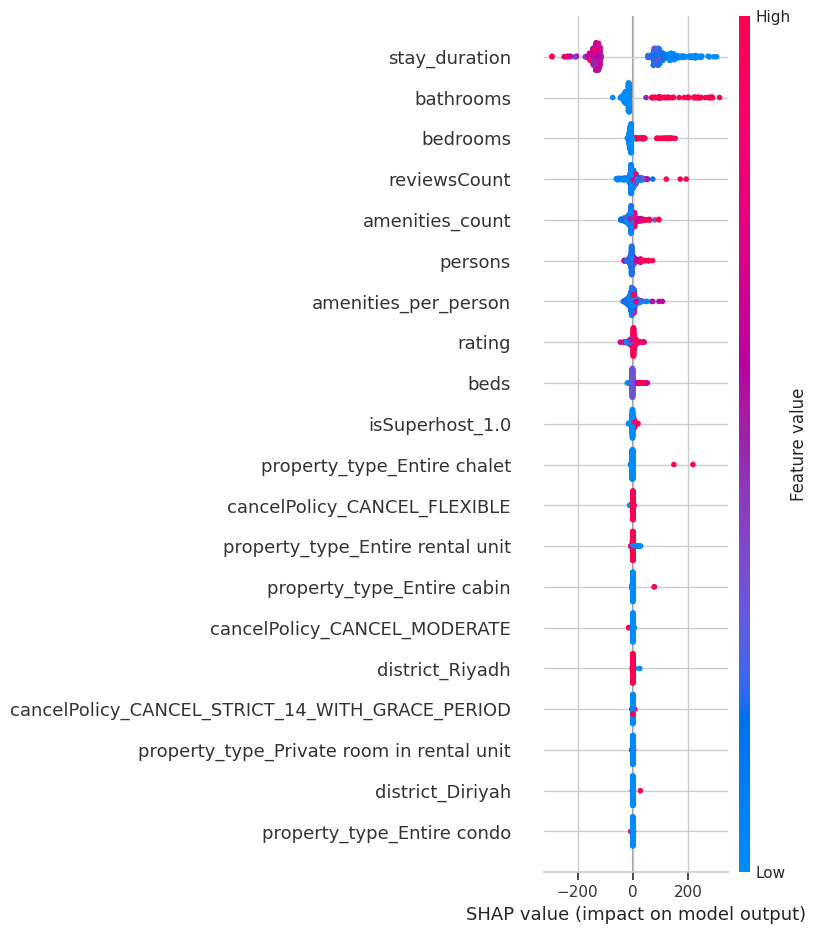

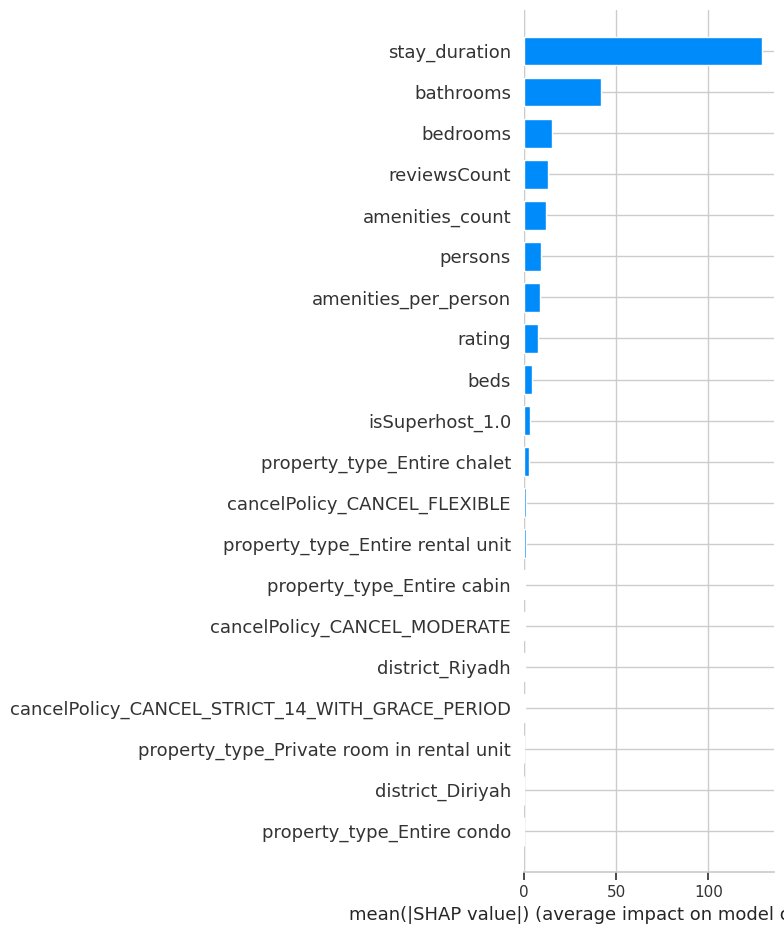


SHAP Top 10 Features Summary:
- Feature 'stay_duration' tends to decrease the predicted price (avg SHAP = -1.95)
- Feature 'bathrooms' tends to increase the predicted price (avg SHAP = 4.54)
- Feature 'bedrooms' tends to decrease the predicted price (avg SHAP = -1.08)
- Feature 'reviewsCount' tends to decrease the predicted price (avg SHAP = -1.04)
- Feature 'amenities_count' tends to decrease the predicted price (avg SHAP = -2.20)
- Feature 'persons' tends to decrease the predicted price (avg SHAP = -0.74)
- Feature 'amenities_per_person' tends to decrease the predicted price (avg SHAP = -0.16)
- Feature 'rating' tends to increase the predicted price (avg SHAP = 0.53)
- Feature 'beds' tends to increase the predicted price (avg SHAP = 0.08)
- Feature 'isSuperhost_1.0' tends to increase the predicted price (avg SHAP = 0.34)


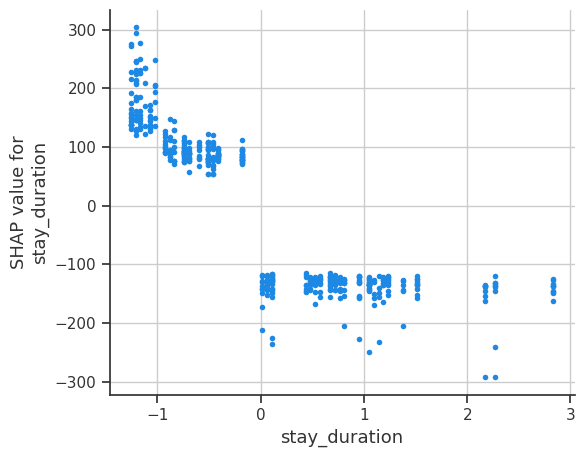

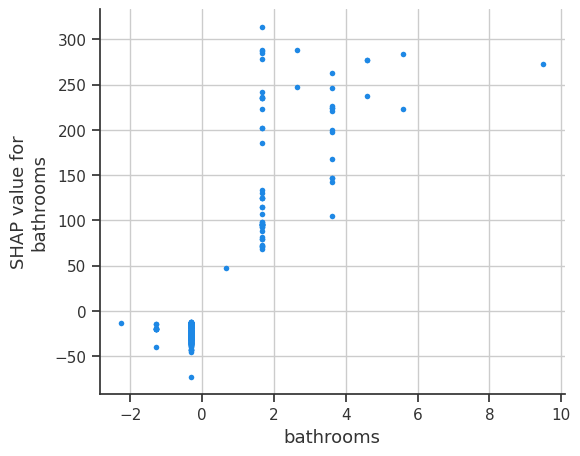

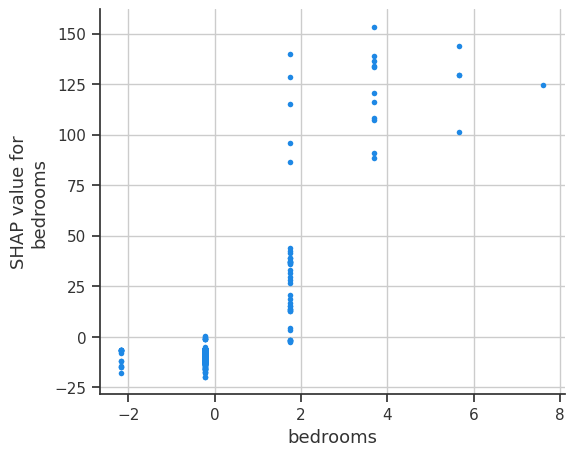

In [29]:
# Feature Importance & SHAP Analysis

# Feature names after encoding
encoded_cat_cols = best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = numeric_features + list(encoded_cat_cols)

# Feature importances from RandomForest
importances = best_model.named_steps['model'].feature_importances_
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)
print("Feature Importances:")
display(feat_imp)

# SHAP Explainer
explainer = shap.TreeExplainer(best_model.named_steps['model'])

# Transform X_test using preprocessing
X_test_transformed = best_model.named_steps['preprocessor'].transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=all_features)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_transformed_df)

# SHAP Summary Plots
shap.summary_plot(shap_values, X_test_transformed_df, plot_type="dot")
shap.summary_plot(shap_values, X_test_transformed_df, plot_type="bar")

# SHAP Textual Summary (Top 10 Features)
shap_df = pd.DataFrame(shap_values, columns=all_features)
shap_mean = shap_df.abs().mean().sort_values(ascending=False)

summary_text = []
for feature in shap_mean.index[:10]:  # top 10 features
    mean_shap = shap_df[feature].mean()
    direction = "increase" if mean_shap > 0 else "decrease"
    summary_text.append(f"- Feature '{feature}' tends to {direction} the predicted price (avg SHAP = {mean_shap:.2f})")

print("\nSHAP Top 10 Features Summary:")
for line in summary_text:
    print(line)

# SHAP Dependence Plot for top 3 features
top_features = shap_mean.index[:3]
for feature in top_features:
    shap.dependence_plot(feature, shap_values, X_test_transformed_df, interaction_index=None)

**Outcome / Interpretation:**
- Features like bedrooms, bathrooms, beds, stay_duration, and amenities_count are usually the most important predictors.
- Categorical features (e.g., isSuperhost) also have measurable impact after one-hot encoding.

This helps understand which features drive price predictions the most.


**SHAP Dot Plot:**
- Each point represents a property; color shows feature value (high/low). Position on x-axis shows impact on predicted price.

E.g., a high bedrooms value (red) pushing the prediction higher → confirms bigger apartments cost more.

Negative SHAP values push predictions lower.

**SHAP Bar Plot:**
Shows average absolute impact of each feature on the model predictions.

Features with longer bars are more influential.

Typically, bedrooms, bathrooms, beds, stay_duration, and amenities_count appear as top drivers.

**Key Insights from SHAP:**

- Larger properties with more bedrooms, bathrooms, and beds generally lead to higher predicted prices.
- Longer stay durations slightly increase price per night predictions (possibly due to total price calculation).
- More amenities per property positively influence price predictions.
- Being a Superhost has a moderate effect depending on the property size and location.

**Residual Analysis**
- Plot residuals distribution
- Plot residuals vs predicted values

**Purpose:** Validate model predictions and check for patterns in errors.

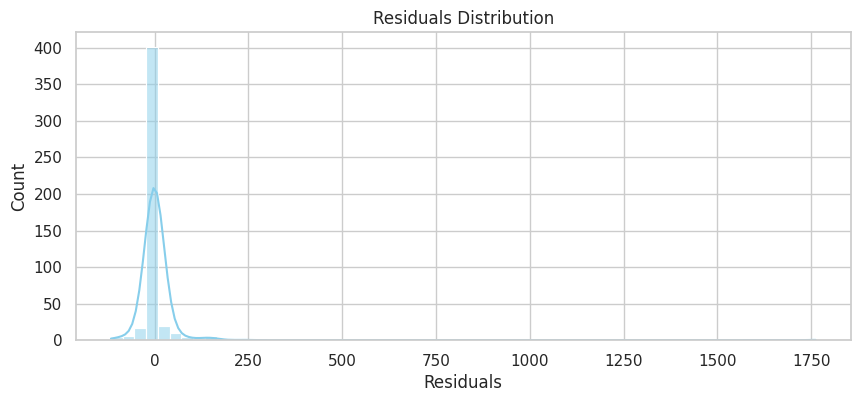

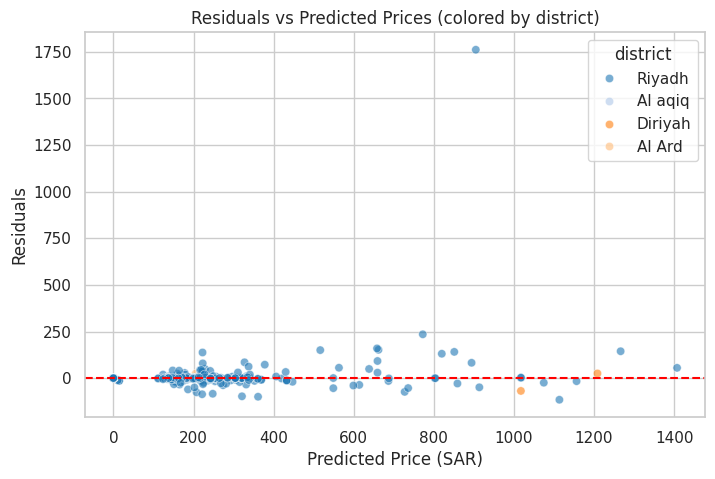

In [30]:
# Residual Analysis

resid = y_test - preds_best

# Residuals distribution
plt.figure(figsize=(10,4))
sns.histplot(resid, bins=60, kde=True, color='skyblue')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=preds_best, y=resid, hue=X_test['district'], palette='tab20', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Prices (colored by district)")
plt.xlabel("Predicted Price (SAR)")
plt.ylabel("Residuals")
plt.show()

**Outcome:** Residuals mostly centered around zero; no strong pattern observed.

**Model Saving**
- Save the trained and tuned model as 'price_model_rf.joblib'

**Purpose:** Store the model for future prediction tasks.

In [31]:
# Save the model

joblib.dump(best_model, 'price_model_rf_enhanced.joblib')
print("Model saved as 'price_model_rf_enhanced.joblib'")

Model saved as 'price_model_rf_enhanced.joblib'


**Outcome:** Model saved successfully.